* To investigate the difference of flux, salt, and freshwater between two bathymetries.

In [1]:
import numpy as np
import netCDF4 as nc
from salishsea_tools import (nc_tools,viz_tools,tidetools,geo_tools,rivertools)
import datetime, os
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})

In [14]:
transects = {'1':{'jst':750, 'ist':250,'jen':756,'ien':280},
            '2':{'jst':725, 'ist':250,'jen':726,'ien':275},
            '3':{'jst':725, 'ist':225,'jen':756,'ien':226},
            '4':{'jst':737, 'ist':272,'jen':745,'ien':273},
            '5':{'jst':820, 'ist':338,'jen':721,'ien':339},
            '6':{'jst':796,'ist':325,'jen':797,'ien':326},
            '7':{'jst':736,'ist':300,'jen':737,'ien':301},
            '8':{'jst':733,'ist': 290,'jen':738,'ien':291},
            '9':{'jst':735,'ist': 284,'jen':737,'ien':285}}
grid = nc.Dataset('/mnt/storage0/jacquielee/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
X = grid.variables['nav_lon'][:,:]
Y = grid.variables['nav_lat'][:,:]
bathy = grid.variables['Bathymetry'][:,:]
timesteps = 10

In [3]:
mesh = nc.Dataset('/mnt/storage0/jacquielee/research/data/Jasper/mesh_mask_anha4_201509.nc')

In [4]:
mesh.variables

OrderedDict([(u'nav_lon', <type 'netCDF4._netCDF4.Variable'>
              float32 nav_lon(y, x)
              unlimited dimensions: 
              current shape = (800, 544)
              filling on, default _FillValue of 9.96920996839e+36 used),
             (u'nav_lat', <type 'netCDF4._netCDF4.Variable'>
              float32 nav_lat(y, x)
              unlimited dimensions: 
              current shape = (800, 544)
              filling on, default _FillValue of 9.96920996839e+36 used),
             (u'nav_lev', <type 'netCDF4._netCDF4.Variable'>
              float32 nav_lev(z)
              unlimited dimensions: 
              current shape = (50,)
              filling on, default _FillValue of 9.96920996839e+36 used),
             (u'time_counter', <type 'netCDF4._netCDF4.Variable'>
              float64 time_counter(t)
              unlimited dimensions: t
              current shape = (1,)
              filling on, default _FillValue of 9.96920996839e+36 used),
             (

In [5]:
tmask = mesh.variables['tmask'][0,:,:,:]
e3t = mesh.variables['e3t'][0,:,:,:]
e2t = mesh.variables['e2t'][0,:,:]
e1t = mesh.variables['e1t'][0,:,:]
np_mask= np.abs(1-tmask) 

In [6]:
coords = nc.Dataset('/mnt/storage0/jacquielee/research/data/Jasper/ANHA4_coordinates.nc')

In [7]:
np_mask.shape

(50, 800, 544)

In [8]:
lat_f = coords.variables['gphif'][:,:]
lon_f = coords.variables['glamf'][:,:]

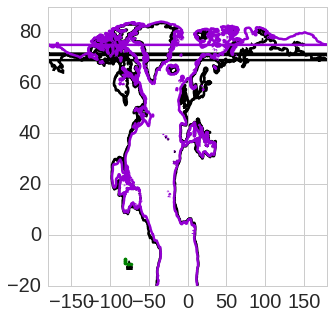

In [9]:
fig, ax = plt.subplots(1,1,figsize = (5,5))
viz_tools.plot_coastline(ax, grid, coords = 'map')
viz_tools.plot_coastline(ax, grid, coords = 'map', isobath = 200,color = 'DarkViolet')
#ax.plot(X[55,25:80],Y[55,25:80],'r^')
#ax.plot(X[25,25:75],Y[25,25:75],'b^')
#ax.plot(X[25:56,25],Y[25:56,25],'g^')
#ax.plot(X[37:45,72],Y[37:45,72],'y^')
ax.plot(X[33:38,90],Y[33:38,90],'k^')
ax.plot(X[35:37,84],Y[35:37,84],'g.') ## transect 9
ax.plot(X[36:37,100],Y[36:37,100],'g.')
ax.plot(X[37:45,72],Y[37:45,72],'g.')
#ax.plot(X[120:121,138],Y[120:121,138],'k^')
#ax.annotate ('transect 1',(X[55,50],Y[55,50]), xycoords="data",color = 'r')
#ax.annotate ('transect 2',(X[25,50],Y[25,50]), xycoords="data",color = 'b')
#ax.annotate ('transect 3',(X[40,25],Y[40,25]), xycoords="data",color = 'g')
#ax.annotate ('transect 4',(X[25,70],Y[25,70]), xycoords="data",color = 'y')
# ax.set_xlim([-123.2,-122.5])
# ax.set_ylim([48.95,49.2])

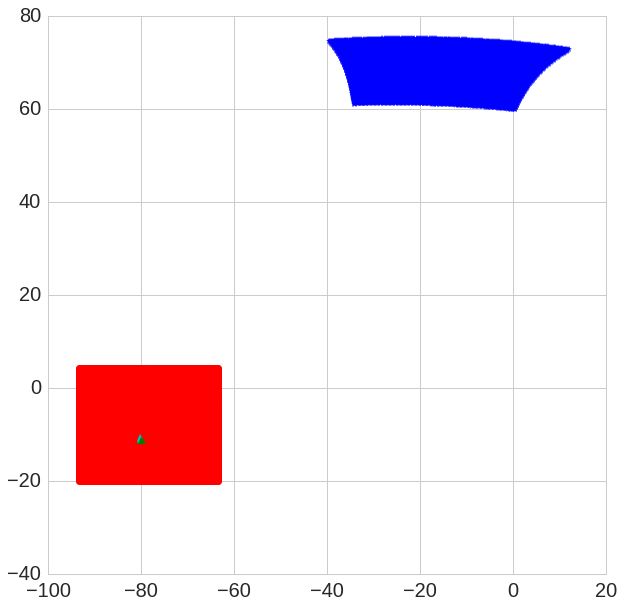

In [10]:
imin = 380; imax=480; jmin = 260; jmax = 380
fig, ax = plt.subplots(1,1,figsize = (10,10))

ax.plot(X[37:45,72],Y[37:45,72],'y^')
ax.plot(X[37:45,76],Y[37:45,76],'g.')
ax.plot(X[34:37,90],Y[34:37,90],'k^')
ax.plot(X[imin-380:imax-380,jmin-240:jmax-240],Y[imin-380:imax-380,jmin-240:jmax-240],'or')
ax.plot(lon_f[imin:imax,jmin:jmax], lat_f[imin:imax,jmin:jmax], 'b*')
ax.plot(X[37,72],Y[37,72], 'g^')
ax.plot(X[38,72],Y[38,72], 'c^')
ax.plot(X[39,72],Y[39,72], 'c^')

ax.plot(X[37,73],Y[37,73],'g^')
ax.plot(X[37,74],Y[37,74],'g^')

# ax.set_xlim([-123.2,-122.5])
# ax.set_ylim([49.05,49.16])

In [17]:
## load salinity into a dict

base='/mnt/storage2/xhu/NEMO/ANHA4-EXH004/'
file_patternT = 'ANHA4-EXH004_y2007m??d??_gridT.nc'
file_patternU = 'ANHA4-EXH004_y2007m??d??_gridU.nc'
file_patternV = 'ANHA4-EXH004_y2007m??d??_gridV.nc'
U = {}; V={}; S={};ssh = {}

    
pathT = glob(os.path.join(base, file_patternT))
pathU = glob(os.path.join(base, file_patternU))
pathV = glob(os.path.join(base, file_patternV))
for i in np.arange(0,timesteps):
    fU = nc.Dataset(pathU[i],'r');
    U[i] = fU.variables['vozocrtx'][0,:,:,:]
    fV = nc.Dataset(pathV[i],'r');
    V[i] = fV.variables['vomecrty'][0,:,:,:]
    depU = fU.variables['depthu']
    depV = fV.variables['depthv']
    fT = nc.Dataset(pathT[0],'r')
    S[i]= fT.variables['vosaline'][0,:,:,:]
    lon = fT.variables['nav_lon'] 
    lat = fT.variables['nav_lat']
    ssh[i] = fT.variables['sossheig'][0,:,:]
    depT = fT.variables['deptht']
    print(i)

0
1
2
3
4
5
6
7
8
9


In [18]:
# for j in np.arange(20,40):
#     U[j] = U[j][0,:,:,:]
#     V[j] = V[j][0,:,:,:]
#     S[j] = S[j][0,:,:,:]
#     ssh[j] = ssh[j][0,:,:]
#     print(j)

print(U[0].shape,V[0].shape,S[0].shape)

((50, 800, 544), (50, 800, 544), (50, 800, 544))


In [34]:
def transport_calculate(S,U,V,ssh,lon,lat,depU,depV,tran,t_st,t_en,S0,fresh_flag = 'fresh',\
                                y0lim =6e5, y1lim = 6000):
    """Same as transport_calculate function, but focus on a continous time period rather 
    than a specific time, including fresh water flux 'fresh' flag,
    salt flux 'salt' flag, and total flux 'None' flag"""
    UU = {}; VV= {};SS={};mask_ = {}
    jinds = np.arange(transects[tran]['jst']-1,transects[tran]['jen'])
    iinds = np.arange(transects[tran]['ist']-1,transects[tran]['ien'])
    print(jinds[0],jinds[-1],iinds[0],iinds[-1])
    SS = np.zeros([timesteps,depU.shape[0],jinds.shape[0],iinds.shape[0]])
    UU = np.zeros([timesteps,depU.shape[0],jinds.shape[0]-1,iinds.shape[0]-1])
    VV = np.zeros([timesteps,depV.shape[0],jinds.shape[0]-1,iinds.shape[0]-1])
    print(SS.shape)
    for t in np.arange(t_st,t_en+1):
        SS[t,:,:,:] = S[t][:,jinds[0]:jinds[-1]+1,iinds[0]:iinds[-1]+1]    
        mask_=np_mask[:,jinds[0]:jinds[-1]+1,iinds[0]:iinds[-1]+1]
        SS[t] = np.ma.masked_array(SS[t],mask=mask_) ## mask sal=0 by tmask 
                    
        if tran == '5' or tran =='7': ##single grid T cell
            u = np.add(U[t][:,jinds[1],iinds][..., :-1], U[t][:,jinds[1],iinds][..., 1:]) / 2
            VV[t]=0
            UU[t] = u.reshape(depU.shape[0],1,1)
        elif tran == '6': ## single grid T cell
            UU[t] =0
            v =np.add(V[t][:,jinds,iinds[0]][..., :-1], V[t][:,jinds,iinds[0]][..., 1:]) / 2
            VV[t] = v.reshape(depV.shape[0],1,1)
        else:
            UU[t],VV[t] = viz_tools.unstagger(U[t][:,jinds,iinds],\
                                          V[t][:,jinds,iinds])

    trans,trans_sur,trans_to= transport_time(SS,UU,VV,ssh,lon,lat,depU,depV,tran,t_st,t_en,\
                                                S0,fresh_flag = fresh_flag) ## get surface/total transport
        ## location
    return trans,trans_sur,trans_to

In [46]:
def transport_time(S,U,V,ssh,lon,lat,depU,depV,tran,t_st,t_en,S0,fresh_flag = 'fresh'):
    """This function was made to calculate total 
    transport/fresh water transport during a continuous 
    period, rather than the specific time 
    fresh_flag = 'fresh', fresh flux; 'salt',salt flux; 'None', total flux"""
    trans = {}; trans_surf = {}; trans_total ={}
    if tran =='3' or tran =='4' or tran =='5' or tran =='7' or tran=='8' or tran =='9': ## cross-shelf transport
       
        trans = np.zeros([timesteps,depU.shape[0],np.arange(transects[tran]['jen']-transects[tran]['jst']).shape[0]])
        for t in np.arange(t_st,t_en+1):
            for z in np.arange(depU.shape[0]):
                for j in np.arange(transects[tran]['jen']-transects[tran]['jst']):
                    d = e2t[j+transects[tran]['jst'],transects[tran]['ist']]

                    if fresh_flag == 'None':
                        ratio = 1
                    elif fresh_flag =='salt' or fresh_flag =='saltNoV':
                        ratio = S[t][z,j+1,1]
                    elif fresh_flag =='fresh':
                        ratio = (S0 - S[t][z,j+1,1])/S0
                    adj_ssh = 1+ssh[t][j+transects[tran]['jst'],transects[tran]['ist']]\
                    /np.sum(e3t[:,j+transects[tran]['jst'],\
                    transects[tran]['ist']]*tmask[:,j+transects[tran]['jst'],transects[tran]['ist']])
                    if fresh_flag =='saltNoV':
                        trans[t,z,j] = d*e3t[z,j+transects[tran]['jst'],transects[tran]['ist']]*adj_ssh*ratio
                    else:
                        trans[t,z,j] = U[t][z,j,0]*d*e3t[z,j+transects[tran]['jst'],transects[tran]['ist']]*adj_ssh*ratio
    else: ## along-shore transport
        
        trans= np.zeros([timesteps,depV.shape[0],np.arange(transects[tran]['ien']-transects[tran]['ist']).shape[0]]);
        for t in np.arange(t_st,t_en+1):
            for z in np.arange(depV.shape[0]):
                for i in np.arange(transects[tran]['ien']-transects[tran]['ist']):
                    d = e1t[transects[tran]['jst'],i+transects[tran]['ist']]
                    if fresh_flag == 'None':
                        ratio = 1
                    elif fresh_flag =='salt' or fresh_flag =='saltNoV':
                        ratio = S[t][z,1,i+1]
                    elif fresh_flag =='fresh':
                        ratio = (S0 - S[t][z,1,i+1])/S0

                    adj_ssh = 1+ssh[t][transects[tran]['jst'],i+transects[tran]['ist']]\
                    /np.sum(e3t[:,transects[tran]['jst'],i+transects[tran]['ist']]*tmask[pa][:,transects[tran]['jst'],i+transects[tran]['ist']])
                    if fresh_flag =='saltNoV':
                        trans[t,z,i] = d*e3t[z,transects[tran]['jst'],i+transects[tran]['ist']]*adj_ssh*ratio ## shape of [40,54]
                    else:
                        trans[t,z,i] = V[t][z,0,i]*d*e3t[z,transects[tran]['jst'],i+transects[tran]['ist']]*adj_ssh*ratio ## shape of [40,54]
    ## surface and total transport in the dict
    
    trans_surf = np.nansum(trans[t_st:t_en+1,0,:],axis = 1)
    trans_total = np.nansum(np.nansum(trans[t_st:t_en+1],axis = 1),axis = 1)
    print(trans_total.shape)
    return trans, trans_surf,trans_total

In [53]:
def plot_series_transportDaily(S,U,V,ssh,lon,lat,depU,depV,tran,tst,ten,S0,data_start,fresh_flag = 'fresh'):
    """This function is the same with plot_series_transport, except 
    that this is not integral over several days, but only for 
    daily case."""
    trans,trans_surf,trans_to = transport_calculate(S,U,V,ssh,lon,lat,depU,depV,tran,tst,ten,\
                                                                 S0,fresh_flag = fresh_flag)
    inte_trans = {}; types = np.arange(0,9)
    for ty in types:
        inte_trans[ty] = np.zeros((ten+1)/24)
    for i in np.arange(tst,ten+1):
        for ty in types:
            inte_trans[ty] = np.sum(trans_to[ty])*3600## intergral individual daily
    fig, axs = plt.subplots(2,1,figsize = (20,9))
    ax = axs[0] ## ssh
    for ty in types:
        ax.plot(ssh[ty][86,89],label = ty)
    ax.set_ylabel('ssh at PA [m]')
    ax.set_xlabel('hour')
    ax = axs[1] ## total volumn flux,salt flux and freshwater flux for selected run case and obs
    e1t, e2t = rivertools.get_bathy_cell_size(grid='/ocean/jieliu/research/meopar/nemo-forcing/grid/coordinates_seagrid_SalishSea.nc')
    real_flows = np.zeros((ten+1)/24);
    real_flows_bathy2 = np.zeros((ten+1)/24);
    data_path = '/data/jieliu/MEOPAR/river-treatment/NewRFraserCElse_y2014m10d'
    data_path_bathy2 = '/data/jieliu/MEOPAR/river-treatment/RFraserCElse_y2014m10d'

    string = 1
    for t in np.arange(tst/24,(ten+1)/24): ## default tst -0, from start
        if string <10:
            real = nc.Dataset(data_path+str(data_start)+str(string)+'.nc')
            real_bathy2 = nc.Dataset(data_path_bathy2+str(data_start)+str(string)+'.nc')
        elif string >=10:
            real = nc.Dataset(data_path+str(string)+'.nc')
            real_bathy2 = nc.Dataset(data_path_bathy2+str(string)+'.nc')
        #print(data_path+str(data_start)+str(string)+'.nc')
        flow = real.variables['rorunoff'][0,500,395]
        real_flows[t] = -flow*e1t[0,500,395]*e2t[0,500,395]*24*3600/1000
        flow_bathy2 = real_bathy2.variables['rorunoff'][0,414,334]
        real_flows_bathy2[t] = -flow_bathy2*3*e1t[0,414,334]*e2t[0,414,334]*24*3600/1000
        string = string+1
    for ty in types:
        ax.plot(inte_trans[ty],'.',label = ty,markersize = 10)
        ax.set_ylabel('Flux $m^3$')    
        ax.set_xlim([(tst-24)/24,(ten+1)/24])
        print(ty,inte_trans[ty].sum(),real_flows.sum())
    ax.plot(real_flows,'*',label = 'real',markersize = 10)
    ax.plot(real_flows_bathy2,'^',label = 'real bathy2',markersize = 10)
    ax.legend(loc = 'best')
    ax.set_xlabel('Day')

(735, 736, 299, 300)
(10, 50, 2, 2)
(9,)


IndexError: too many indices for array

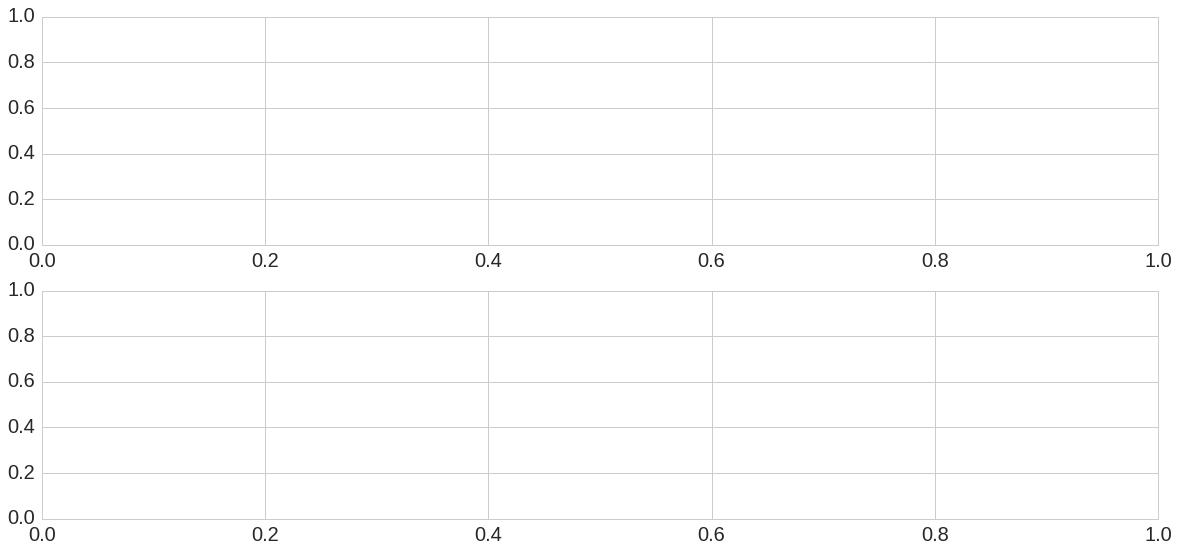

In [54]:
## single grid cell
plot_series_transportDaily(S,U,V,ssh,lon,lat,depU,depV,'7',0,8,30,0,fresh_flag='None')

Oct2014nowind -5296837264.08 -5494582045.53
Oct2014nowindBathy2_accurate -5310664803.51 -5494582045.53


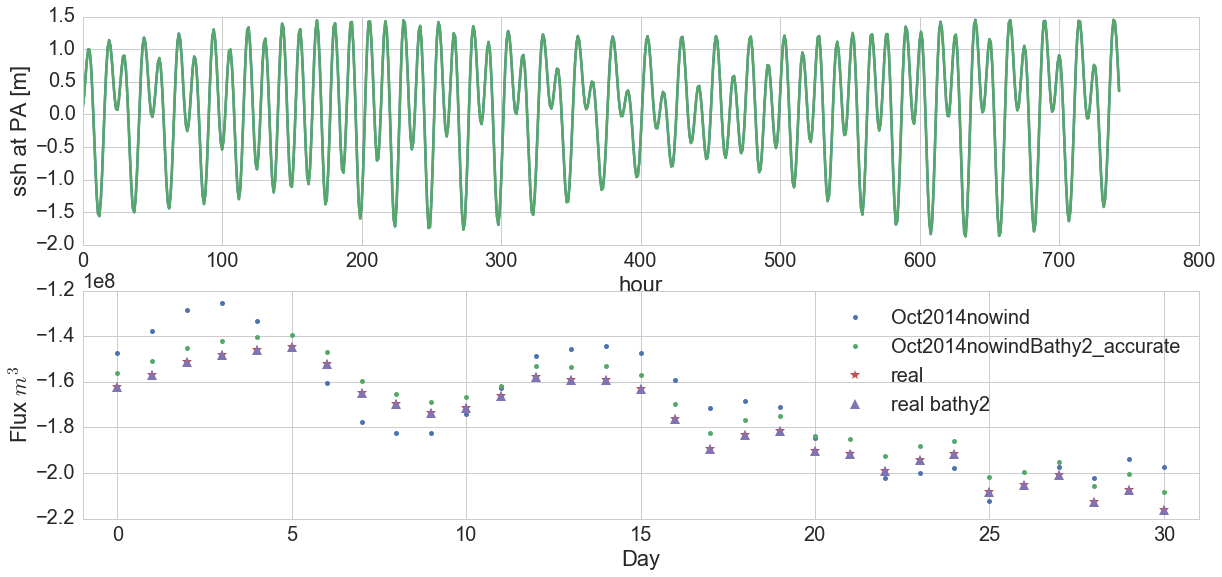

In [12]:
## Deas Island channel transect 33:38 instead of 34:37 to see the difference
plot_series_transportDaily(S,U,V,ssh,lon,lat,depU,depV,'8',0,743,30,0,fresh_flag='None')

Oct2014nowind -5296242134.76 -5494582045.53
Oct2014nowindBathy2_accurate -5310026754.85 -5494582045.53


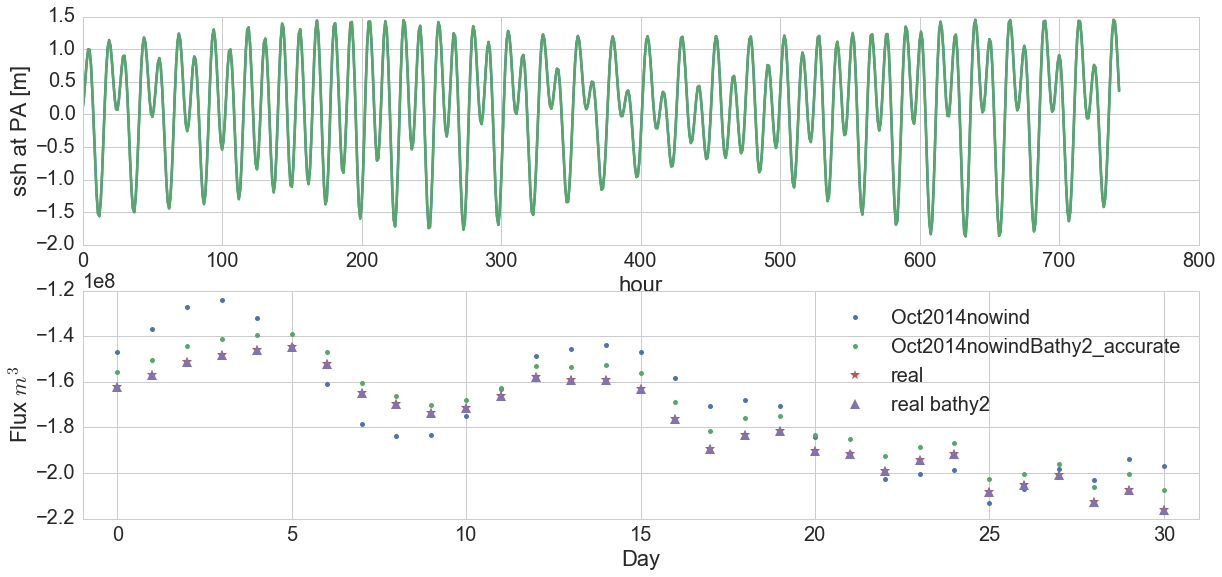

In [13]:
## two grid cells after Deas Island channel
plot_series_transportDaily(S,U,V,ssh,lon,lat,depU,depV,'9',0,743,30,0,fresh_flag='None')

Oct2014nowind -5598274223.71 -5494582045.53
Oct2014nowindBathy2_accurate -5343105832.31 -5494582045.53


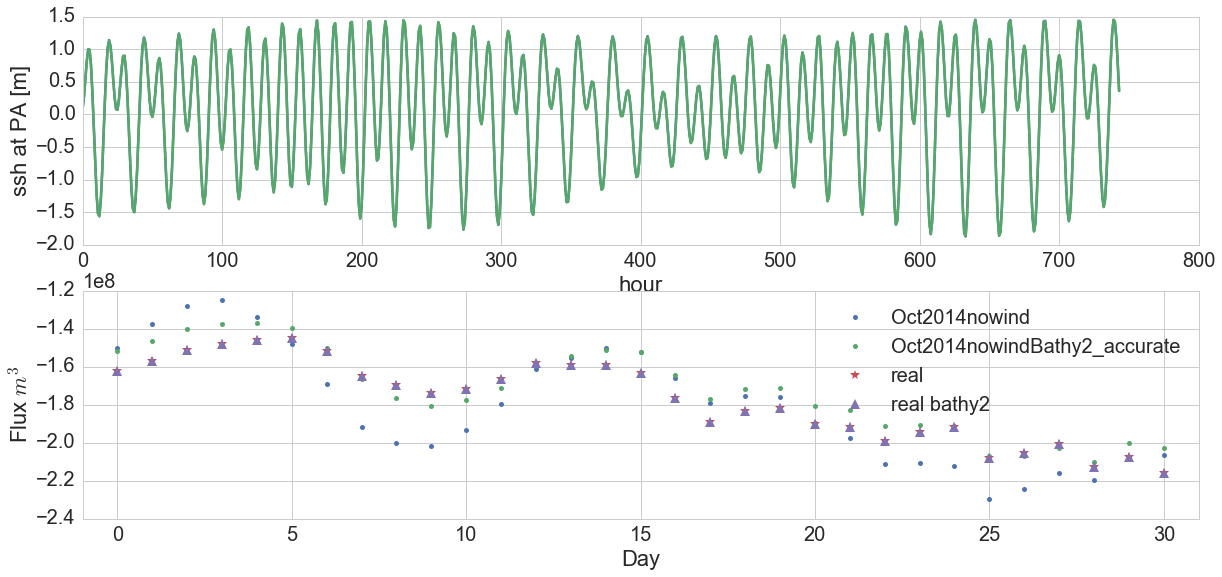

In [14]:
## river mouth transect
plot_series_transportDaily(S,U,V,ssh,lon,lat,depU,depV,'4',0,743,30,0,fresh_flag='None')

In [15]:
def plot_series_transport(S,U,V,ssh,lon,lat,depU,depV,tran,tst,ten,S0,fresh_flag = 'fresh'):
    """Plot the transport time series in hourly results"""
    trans,trans_surf,trans_to = transport_calculate(S,U,V,ssh,lon,lat,depU,depV,tran,tst,ten,\
                                                                 S0,fresh_flag = fresh_flag)
    inte_trans = {}; types = ['Oct2014nowind','Oct2014nowindBathy2_accurate']
    fig, axs = plt.subplots(2,1,figsize = (20,9))
    ax = axs[0] ## ssh
    for ty in types:
        ax.plot(ssh[ty][tst:ten+1,86,89],label = ty)
    ax.set_ylabel('ssh at PA [m]')
    ax.set_xlabel('hour')
    ax = axs[1] ## total volumn flux,salt flux and freshwater flux for selected run case and obs
    for ty in types:
        ax.plot(trans_to[ty],'-',marker = '.',label = ty,markersize = 10)
        if fresh_flag =='saltNoV':
            ax.set_ylabel('Salinity integral $m^2$')
        else:
            ax.set_ylabel('Flux $m^3/s$')    
    ax.legend(loc = 'best')
    ax.set_xlabel('hour')

# Check salinity, salt flux and total volume flux close to the original river source

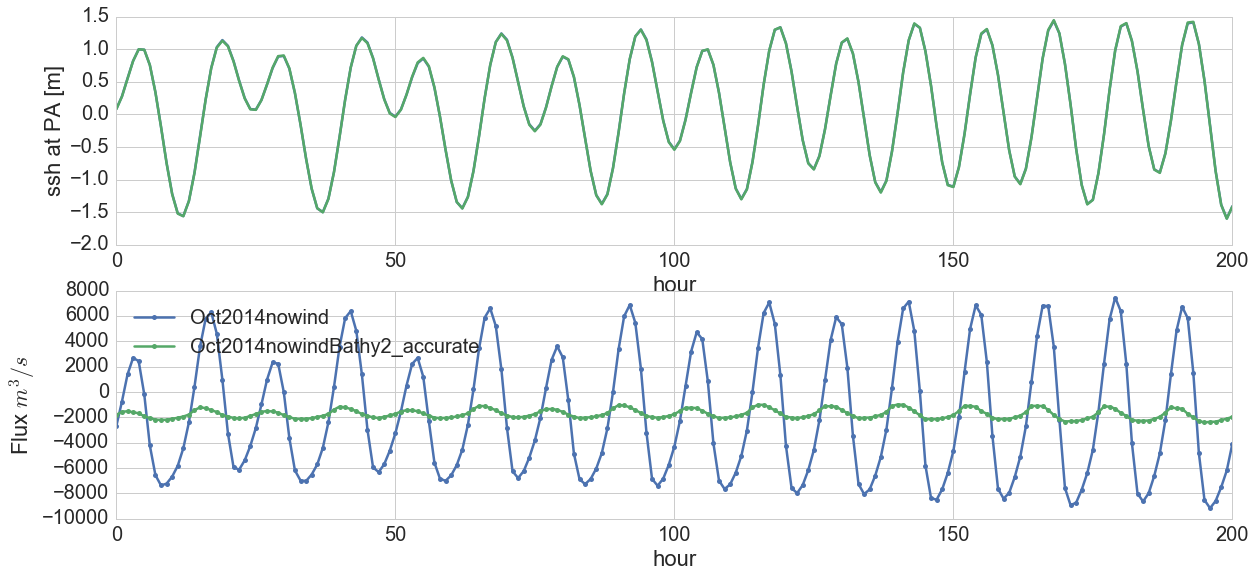

In [16]:
plot_series_transport(S,U,V,ssh,lon,lat,depU,depV,'8',0,200,30,fresh_flag='None')

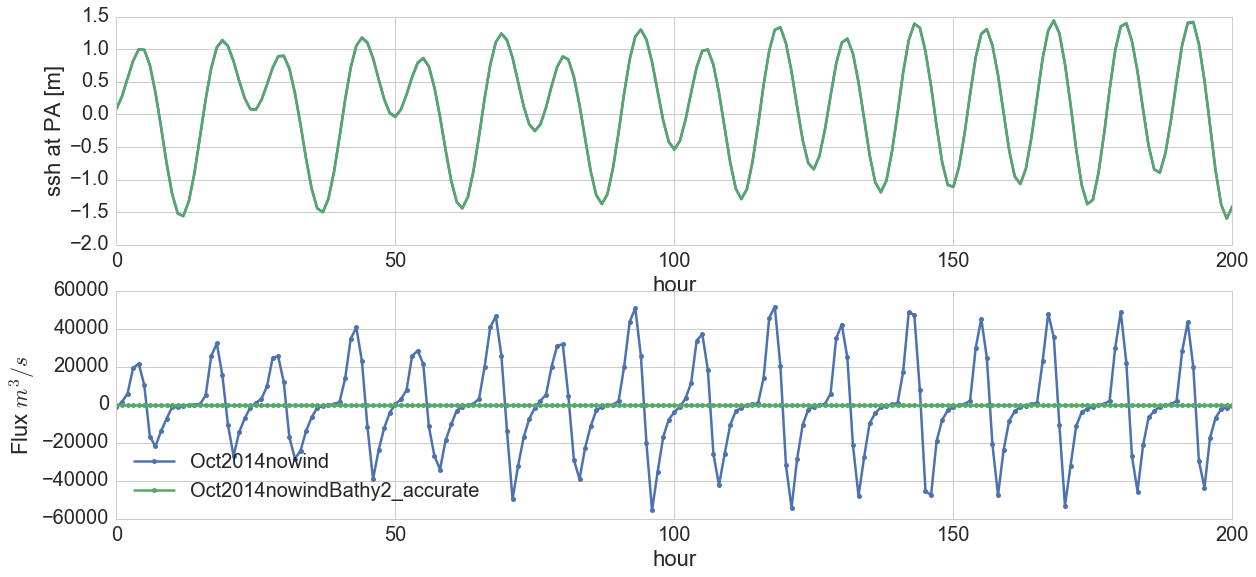

In [17]:
plot_series_transport(S,U,V,ssh,lon,lat,depU,depV,'8',0,200,30,fresh_flag='salt')

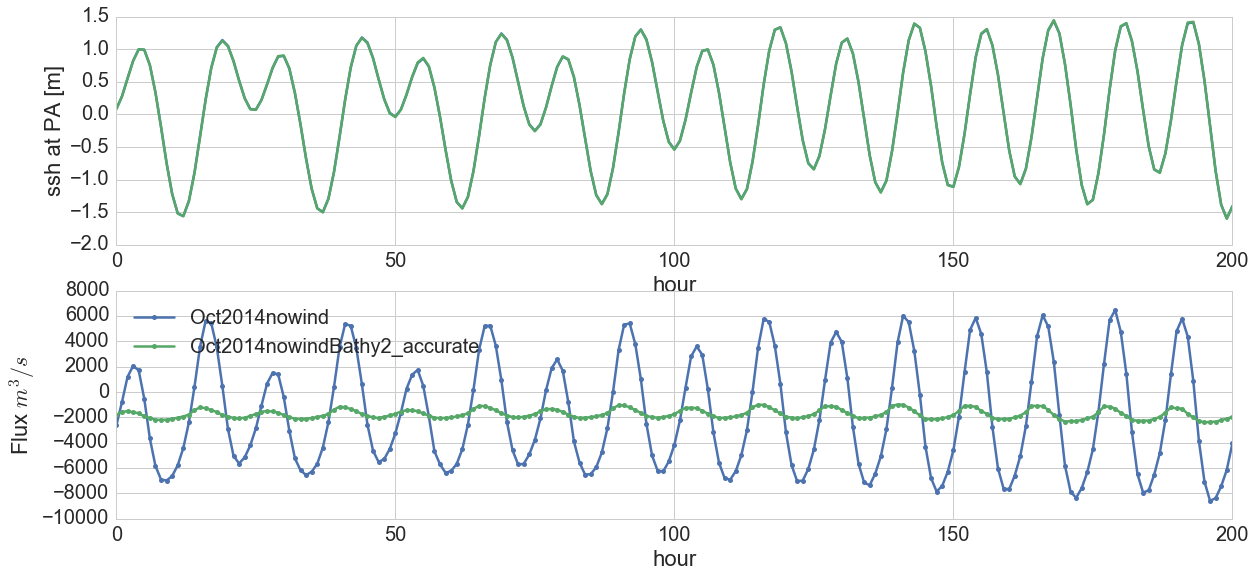

In [18]:
plot_series_transport(S,U,V,ssh,lon,lat,depU,depV,'8',0,200,30,fresh_flag='fresh')

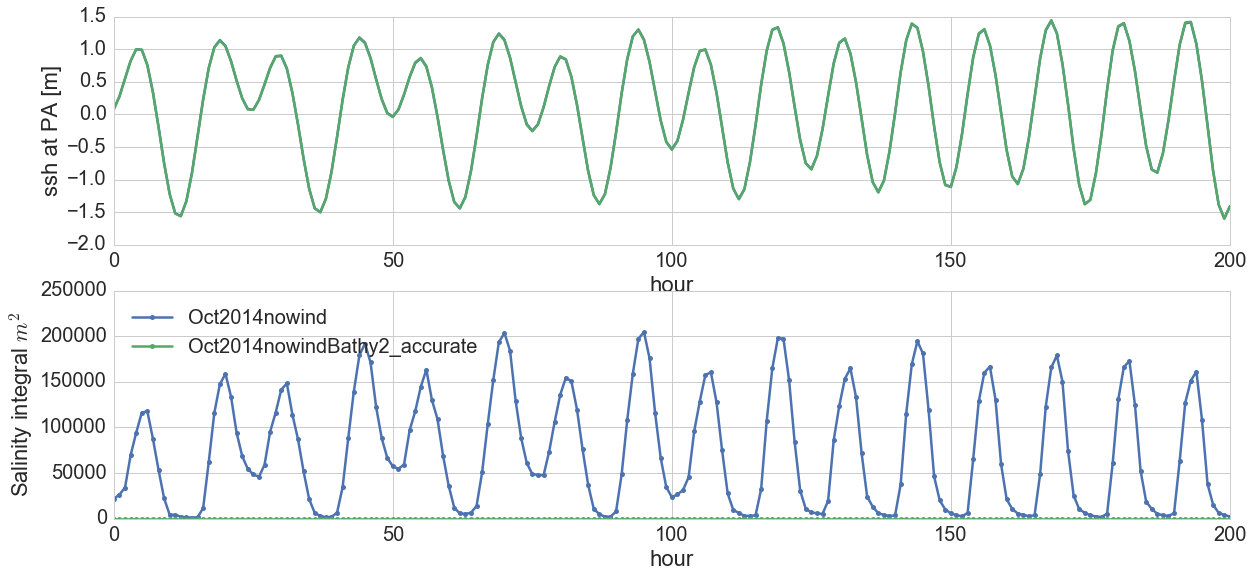

In [19]:
plot_series_transport(S,U,V,ssh,lon,lat,depU,depV,'8',0,200,30,fresh_flag='saltNoV')

Oct2014nowind -3124128105.45 -3277616125.27
Oct2014nowindBathy2_accurate -3164896734.25 -3277616125.27


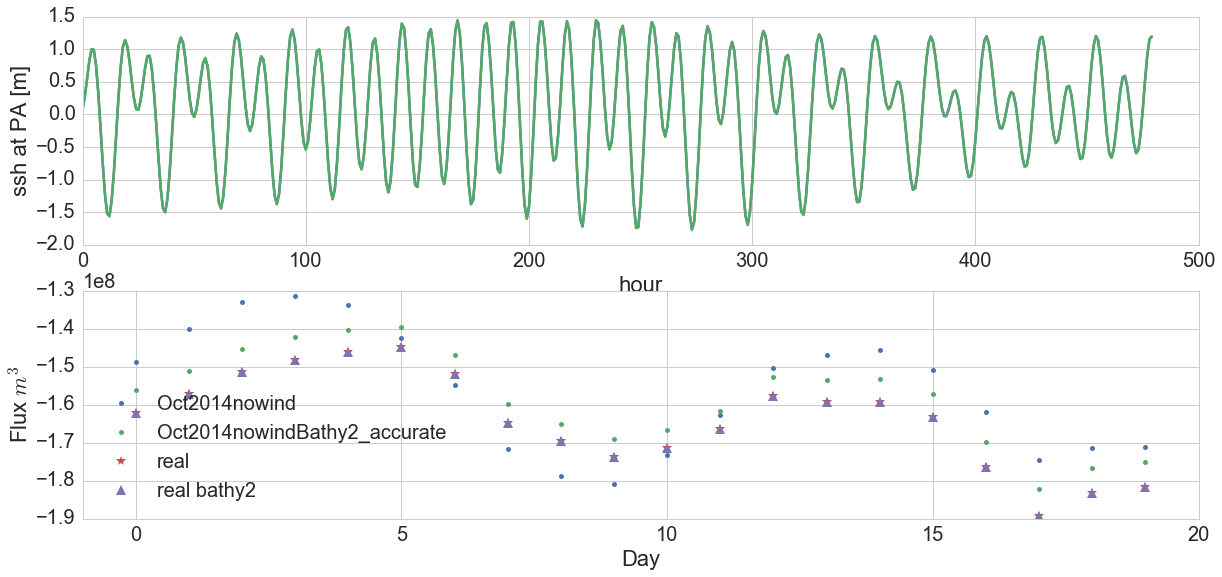

In [20]:
plot_series_transportDaily(S,U,V,ssh,lon,lat,depU,depV,'8',0,479,30,0,fresh_flag='fresh')

Oct2014nowind 344787834.586 -3277616125.27
Oct2014nowindBathy2_accurate -4.34717536052e-16 -3277616125.27


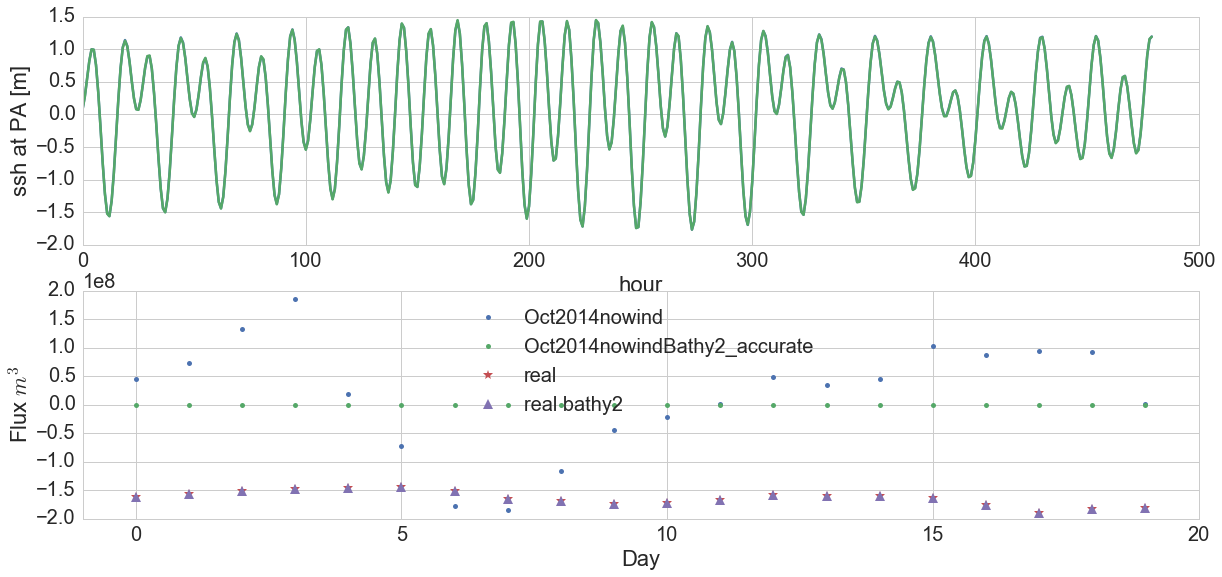

In [21]:
plot_series_transportDaily(S,U,V,ssh,lon,lat,depU,depV,'8',0,479,30,0,fresh_flag='salt')

Oct2014nowind 144587860271.0 -3277616125.27
Oct2014nowindBathy2_accurate 1.92979369937e-15 -3277616125.27


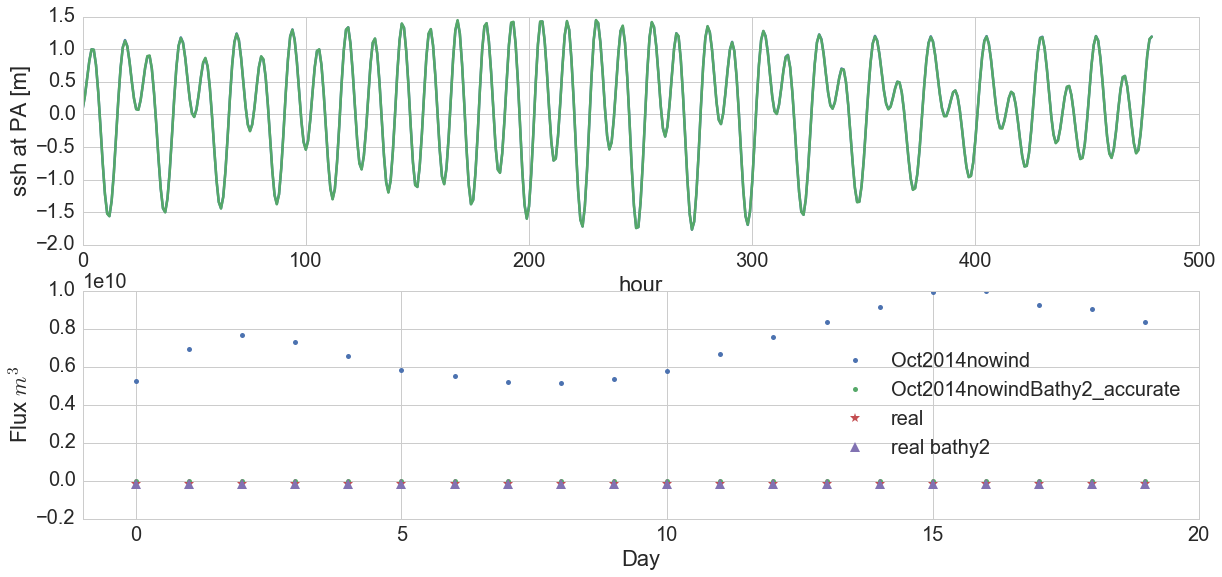

In [22]:
plot_series_transportDaily(S,U,V,ssh,lon,lat,depU,depV,'8',0,479,30,0,fresh_flag='saltNoV')

# Check at river mouth

Oct2014nowind -427467190.379 -3277616125.27
Oct2014nowindBathy2_accurate -2986387172.03 -3277616125.27


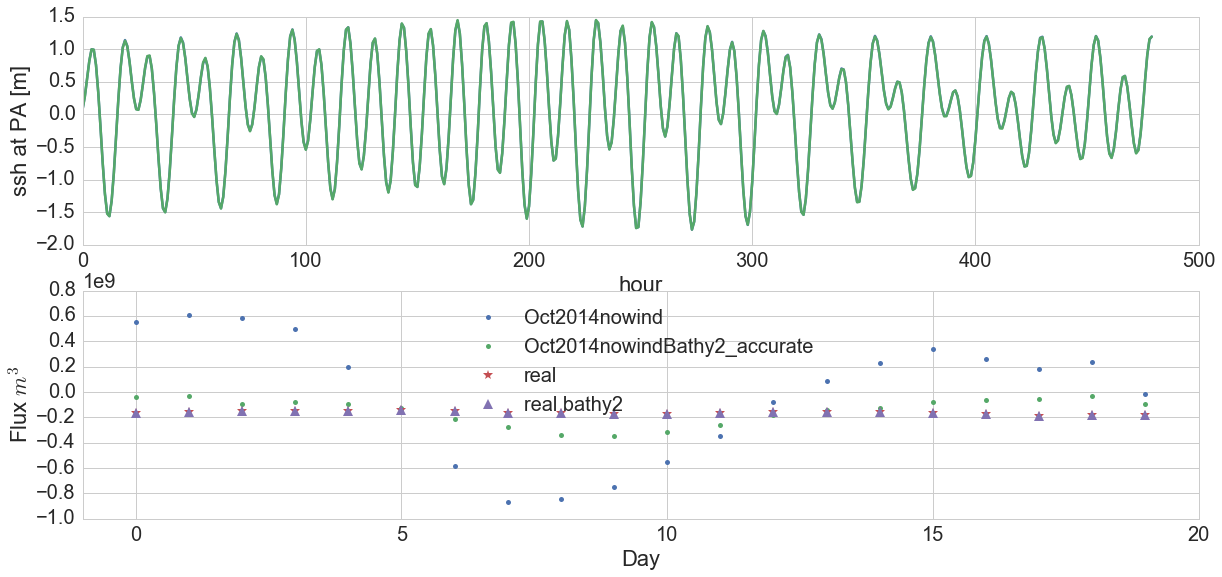

In [23]:
plot_series_transportDaily(S,U,V,ssh,lon,lat,depU,depV,'4',0,479,30,0,fresh_flag='salt')

Oct2014nowind -3260533844.02 -3277616125.27
Oct2014nowindBathy2_accurate -3076375179.25 -3277616125.27


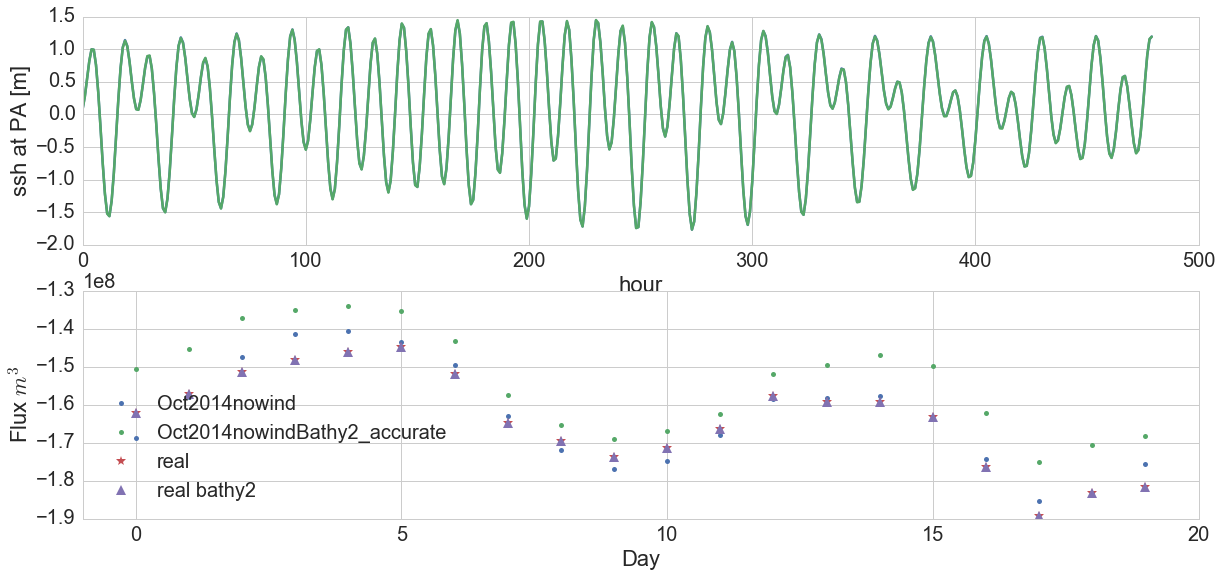

In [24]:
plot_series_transportDaily(S,U,V,ssh,lon,lat,depU,depV,'4',0,479,30,0,fresh_flag='fresh')

Oct2014nowind 1.16999974204e+12 -3277616125.27
Oct2014nowindBathy2_accurate 273745353252.0 -3277616125.27


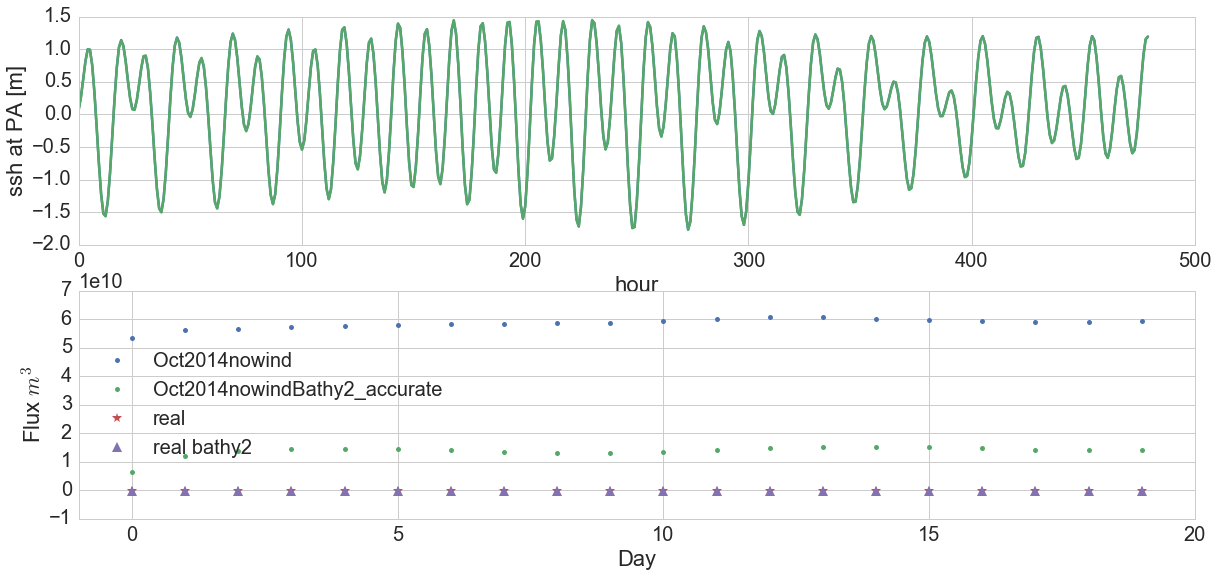

In [25]:
plot_series_transportDaily(S,U,V,ssh,lon,lat,depU,depV,'4',0,479,30,0,fresh_flag='saltNoV')

look at the hourly variation of volume flux and only salt amount (no times velocity), I didn't expect there is difference between bathy2 and 6 with only river.

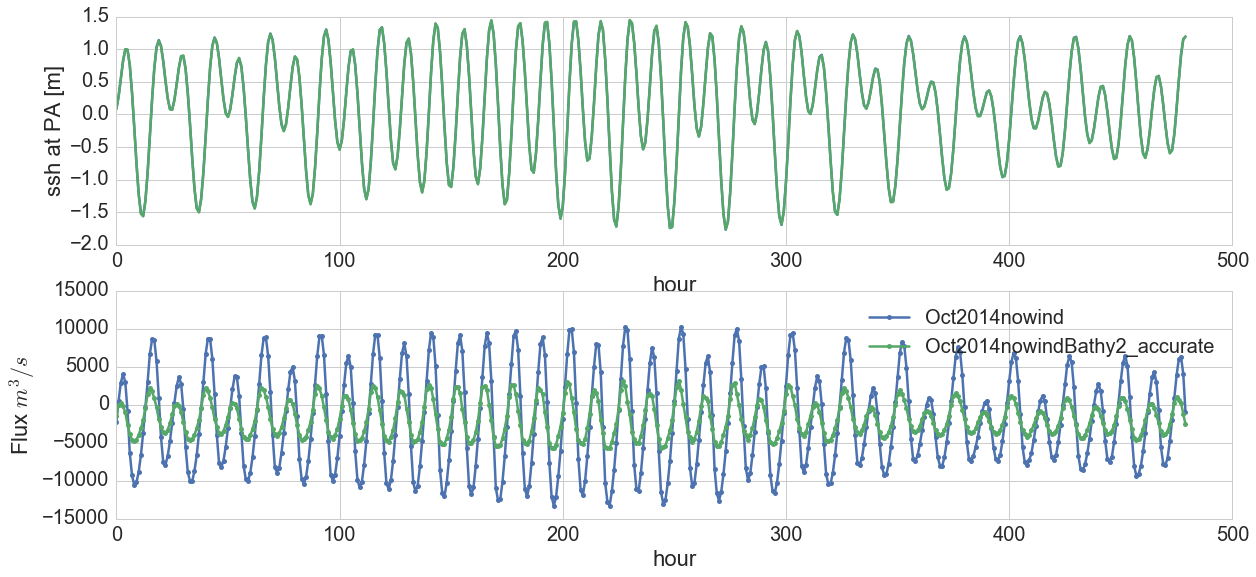

In [26]:
plot_series_transport(S,U,V,ssh,lon,lat,depU,depV,'4',0,479,30,fresh_flag='None')

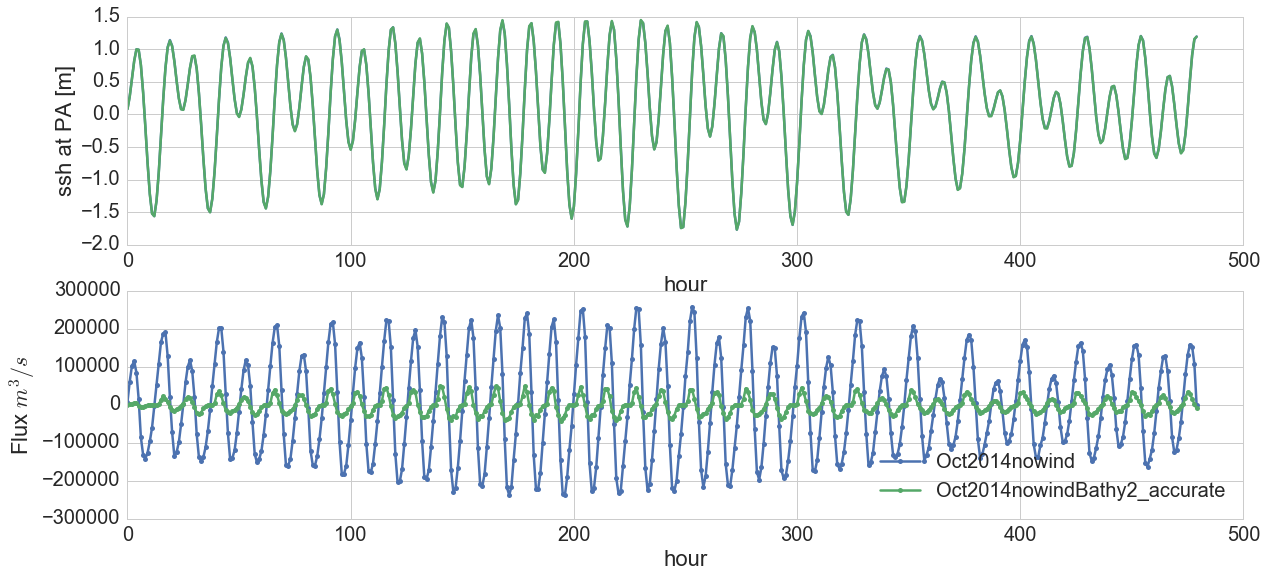

In [27]:
plot_series_transport(S,U,V,ssh,lon,lat,depU,depV,'4',0,479,30,fresh_flag='salt')

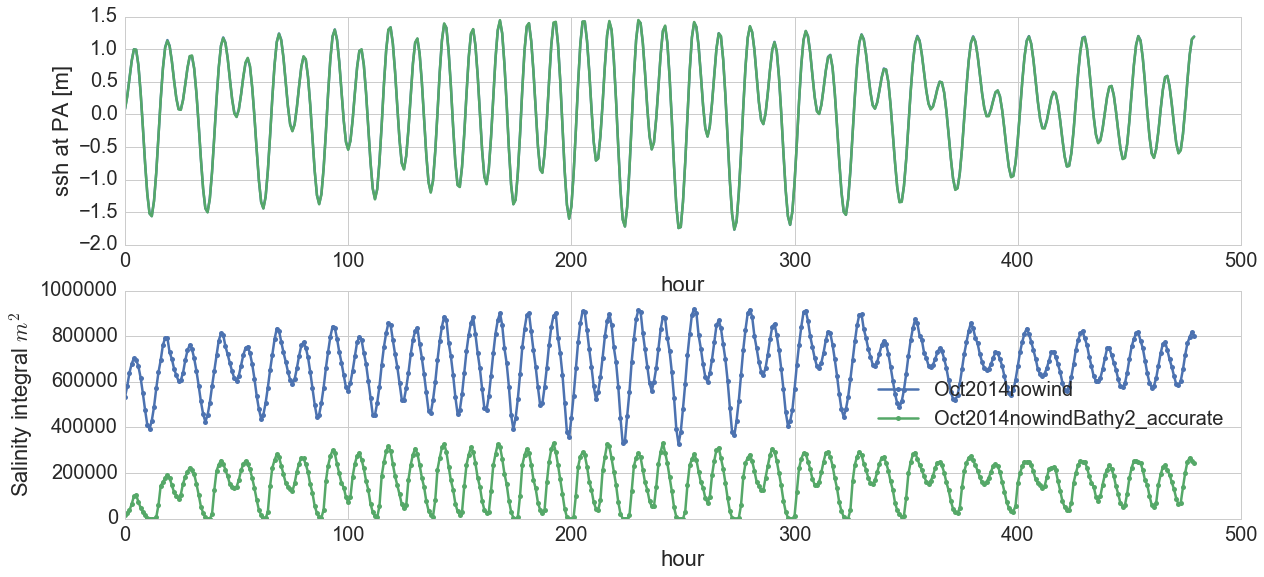

In [28]:
plot_series_transport(S,U,V,ssh,lon,lat,depU,depV,'4',0,479,30,fresh_flag='saltNoV')

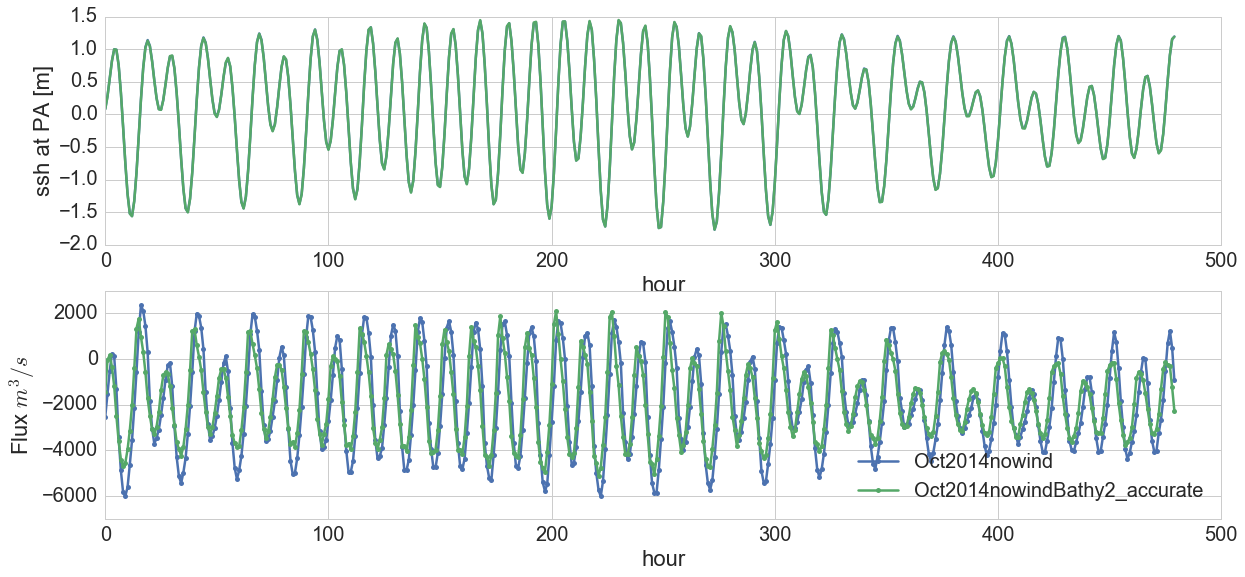

In [29]:
plot_series_transport(S,U,V,ssh,lon,lat,depU,depV,'4',0,479,30,fresh_flag='fresh')

In [30]:
def plot_series_transportDaily_topfour(S,U,V,ssh,lon,lat,depU,depV,tran,tst,ten,S0,fresh_flag = 'fresh'):
    """This function is the same with plot_series_transport, except 
    that this is not integral over several days, but only for 
    daily case."""
    trans,trans_surf,trans_to = transport_calculate(S,U,V,ssh,lon,lat,depU,depV,tran,tst,ten,\
                                                                 S0,fresh_flag = fresh_flag)
    trans_topFour = {};
    for pa in paths:
        trans_topFour[pa] = np.nansum(np.nansum(trans[pa][tst:ten+1,0:5],axis = 1),axis = 1)
    
    inte_trans = {}; types = ['Oct2014nowind','Oct2014nowindBathy2_accurate']
    for ty in types:
        inte_trans[ty] = np.zeros((ten+1)/24)
    for i in np.arange(tst,ten+1,24):
        for ty in types:
            inte_trans[ty][i/24] = np.sum(trans_topFour[ty][i:i+24])*3600## intergral individual daily
    fig, axs = plt.subplots(2,1,figsize = (20,9))
    ax = axs[0] ## ssh
    for ty in types:
        ax.plot(ssh[ty][tst:ten+1,86,89],label = ty)
    ax.set_ylabel('ssh at PA [m]')
    ax.set_xlabel('hour')
    ax = axs[1] ## total volumn flux,salt flux and freshwater flux for selected run case and obs
    for ty in types:
        ax.plot(inte_trans[ty],'.',label = ty,markersize = 10)
        ax.set_ylabel('Flux $m^3$')    
        ax.set_xlim([(tst-24)/24,(ten+1)/24])
    ax.legend(loc = 'best')
    ax.set_xlabel('Day')

In [31]:
def plot_series_transport_topfour(S,U,V,ssh,lon,lat,depU,depV,tran,tst,ten,S0,fresh_flag = 'fresh'):
    """
    
    """
    trans,trans_surf,trans_to = transport_calculate(S,U,V,ssh,lon,lat,depU,depV,tran,tst,ten,\
                                                                 S0,fresh_flag = fresh_flag)
    trans_topFour = {};
    for pa in paths:
        trans_topFour[pa] = np.nansum(np.nansum(trans[pa][tst:ten+1,0:5],axis = 1),axis = 1)
    types = ['Oct2014nowind','Oct2014nowindBathy2_accurate']
    fig, axs = plt.subplots(2,1,figsize = (20,9))
    ax = axs[0] ## ssh
    for ty in types:
        ax.plot(ssh[ty][tst:ten+1,86,89],label = ty)
    ax.set_ylabel('ssh at PA [m]')
    ax.set_xlabel('hour')
    ax = axs[1] ## total volumn flux,salt flux and freshwater flux for selected run case and obs
    for ty in types:
        ax.plot(trans_topFour[ty],'-',marker = '.',label = ty,markersize = 10)
        if fresh_flag =='saltNoV':
            ax.set_ylabel('Salinity integral $m^2$')
        else:
            ax.set_ylabel('Flux $m^3/s$')    
    ax.legend(loc = 'best')
    ax.set_xlabel('hour')

# check integral over top 4m at river mouth

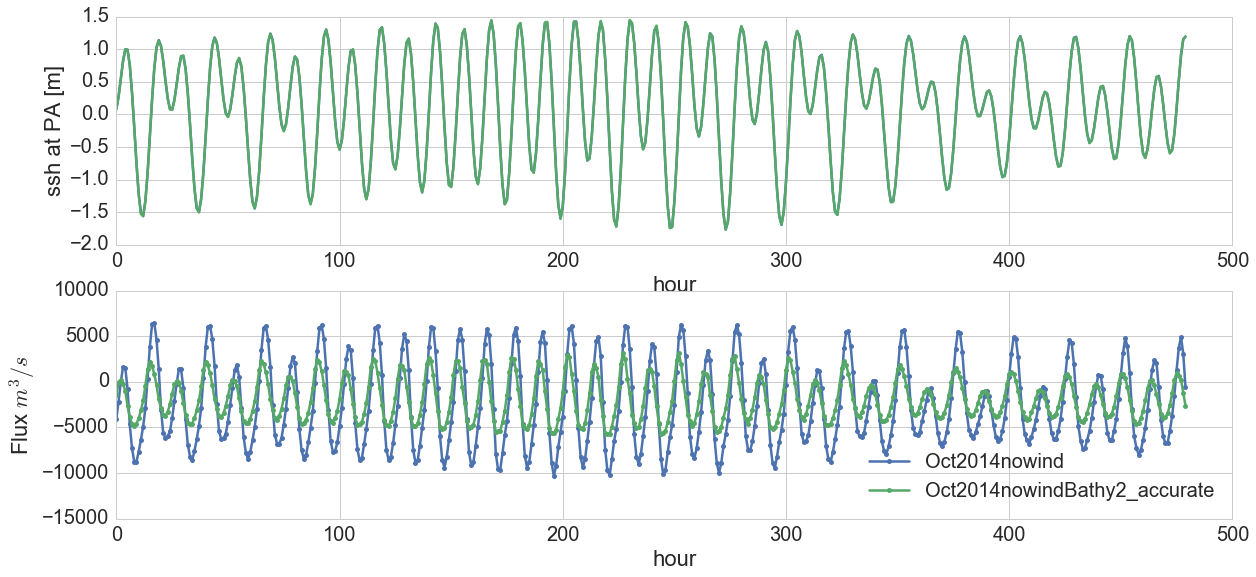

In [32]:
plot_series_transport_topfour(S,U,V,ssh,lon,lat,depU,depV,'4',0,479,30,fresh_flag='None')

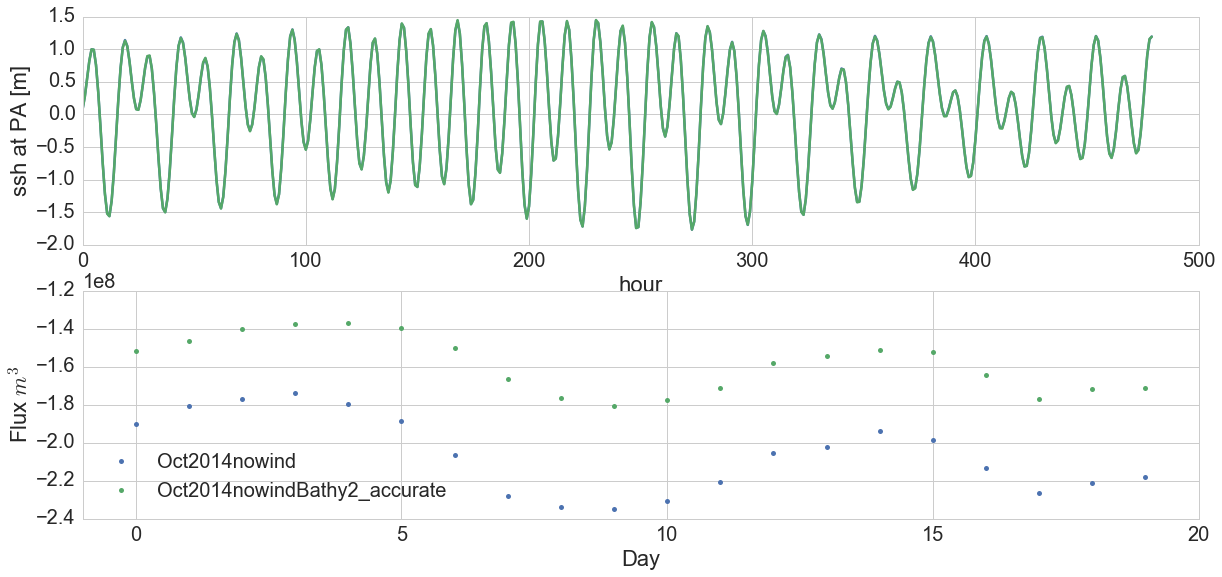

In [33]:
plot_series_transportDaily_topfour(S,U,V,ssh,lon,lat,depU,depV,'4',0,479,30,fresh_flag='None')

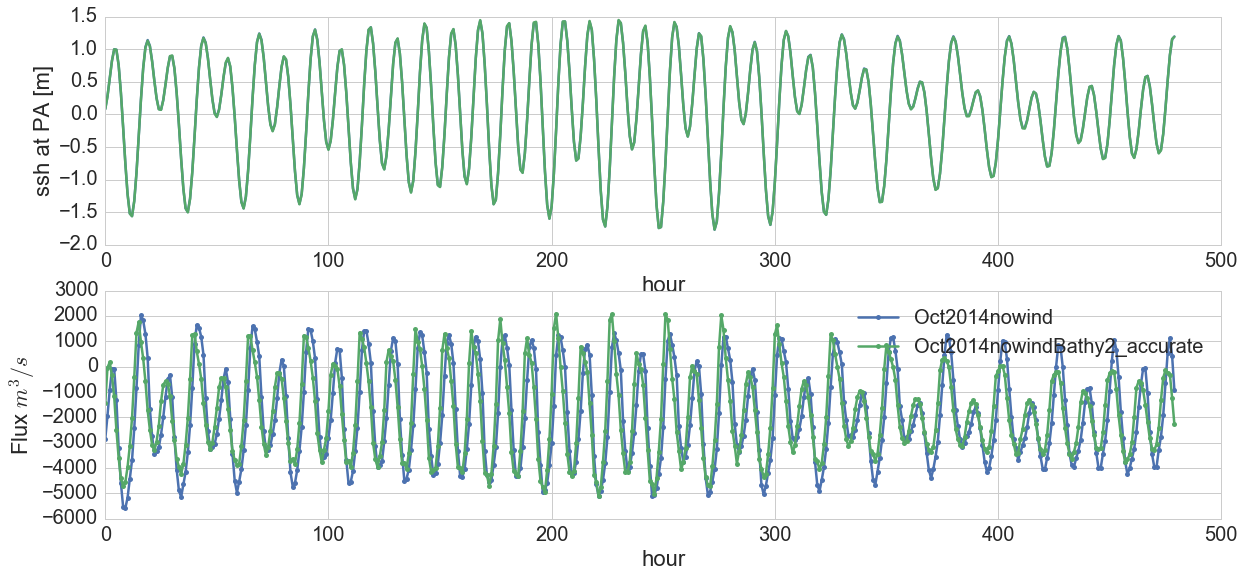

In [34]:
plot_series_transport_topfour(S,U,V,ssh,lon,lat,depU,depV,'4',0,479,30,fresh_flag='fresh')

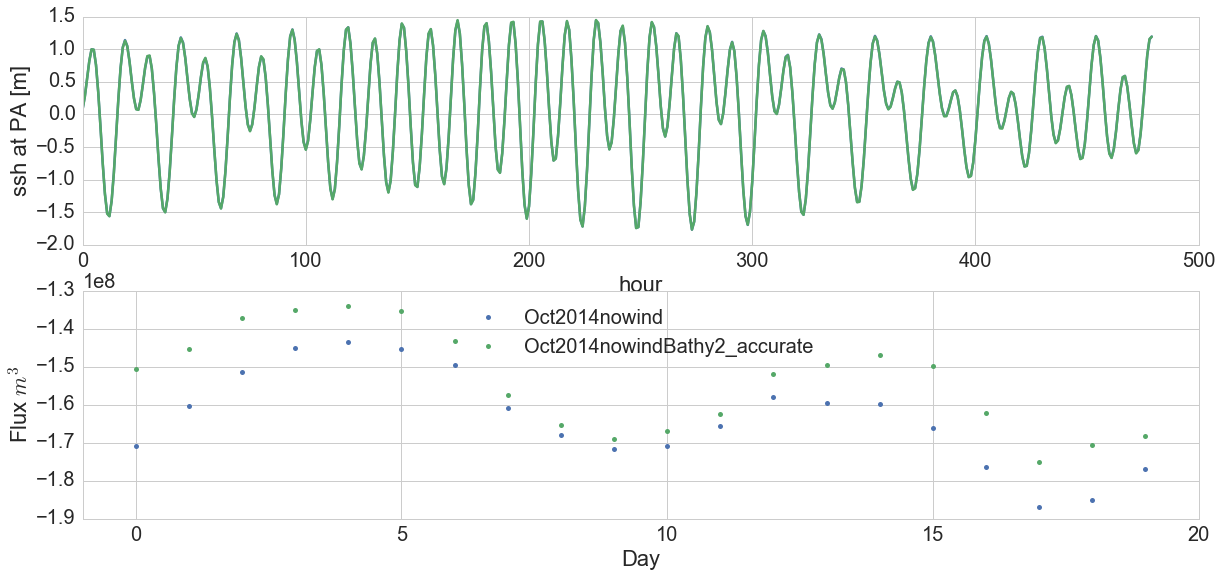

In [35]:
plot_series_transportDaily_topfour(S,U,V,ssh,lon,lat,depU,depV,'4',0,479,30,fresh_flag='fresh')

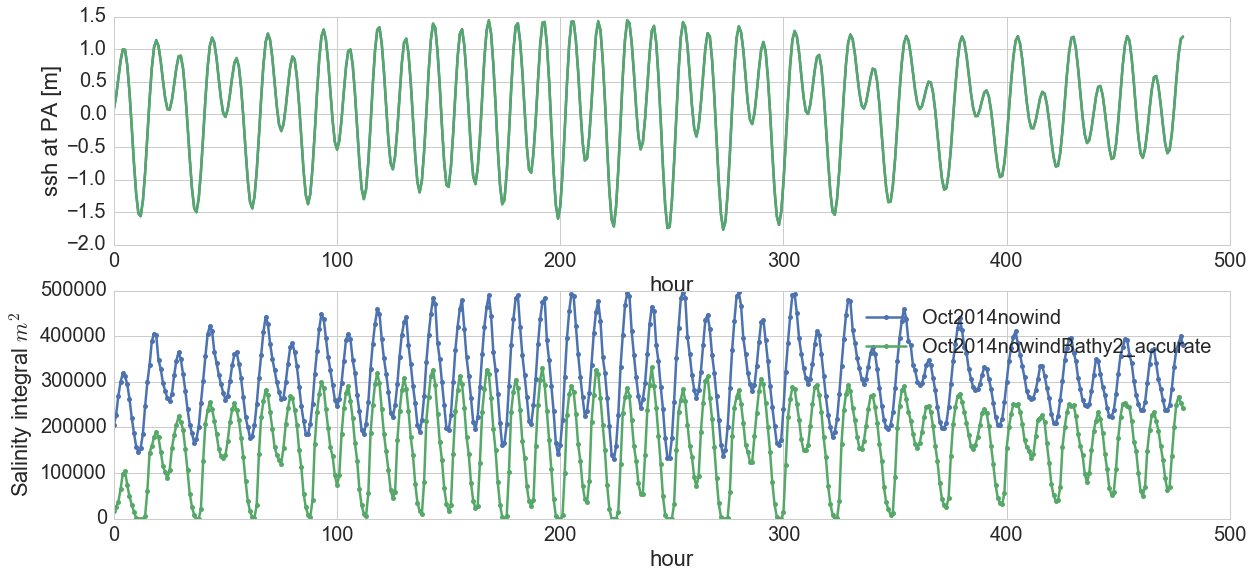

In [36]:
plot_series_transport_topfour(S,U,V,ssh,lon,lat,depU,depV,'4',0,479,30,fresh_flag='saltNoV')

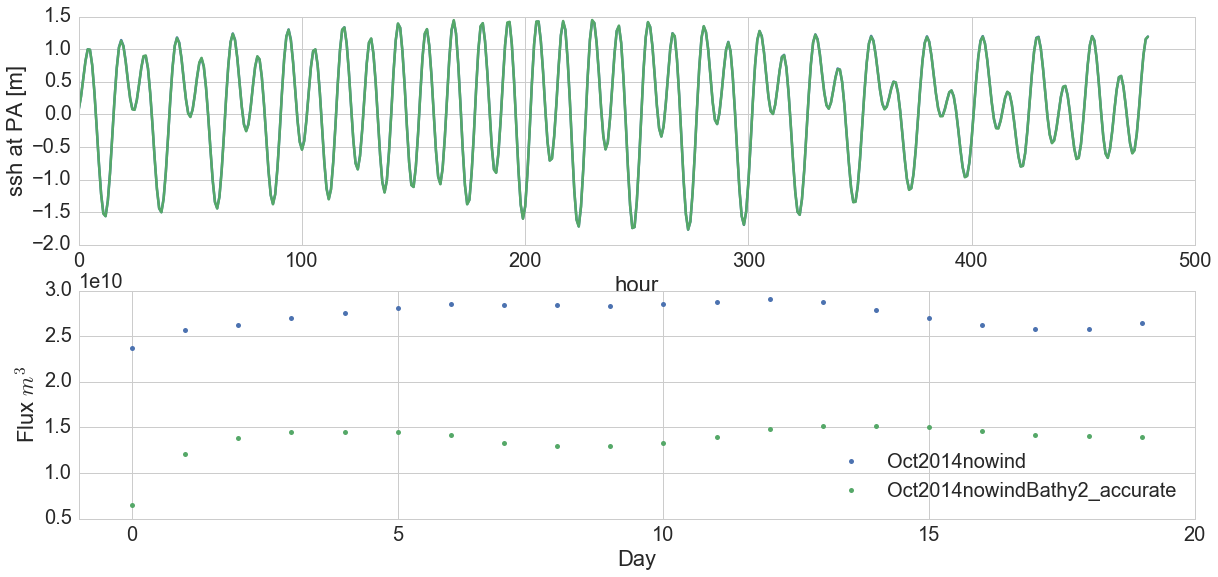

In [37]:
plot_series_transportDaily_topfour(S,U,V,ssh,lon,lat,depU,depV,'4',0,479,30,fresh_flag='saltNoV')

In [58]:
trans,trans_surf,trans_to=transport_calculate(S,U,V,ssh,lon,lat,depU,depV,'4',0,719,30,fresh_flag='None')

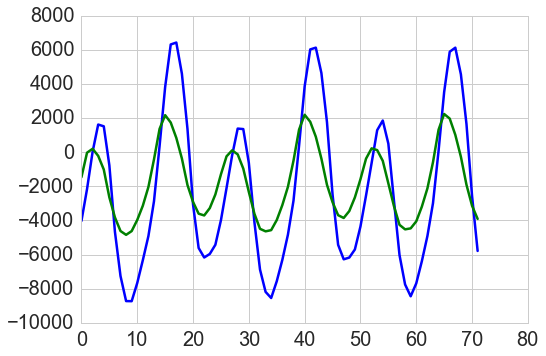

In [59]:
plt.plot(np.nansum(np.nansum(trans['Oct2014nowind'][0:72,0:5,:],axis = 1),axis = 1),'b')
plt.plot(np.nansum(np.nansum(trans['Oct2014nowindBathy2_accurate'][0:72,0:5,:],axis = 1),axis = 1),'g')

In [60]:
nowind =np.nansum(np.nansum(trans['Oct2014nowind'][:,:,:],axis = 1),axis = 1)
nowind_2 = np.nansum(np.nansum(trans['Oct2014nowindBathy2_accurate'][:,:,:],axis = 1),axis = 1)

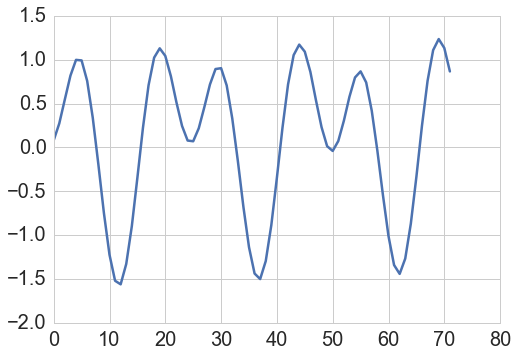

In [61]:
plt.plot(ssh['Oct2014nowindBathy2_accurate'][0:72,86,89])

In [63]:
for start in np.arange(0,696,24):
    end = start+24
    a = np.nanargmax(nowind[start:end])
    b = np.nanargmin(nowind[start:end])
    c = np.nanargmax(nowind_2[start:end])
    d = np.nanargmin(nowind_2[start:end])
    print(a-b,c-d, a-b-c+d)## first value for bathy6,second for 2, value is high time -low time


8 7 1
8 7 1
8 7 1
8 7 1
7 7 0
7 18 -11
19 19 0
8 7 1
8 7 1
7 6 1
8 8 0
8 8 0
8 7 1
8 7 1
8 7 1
7 7 0
-5 -6 1
19 18 1
19 17 2
20 18 2
19 19 0
7 7 0
8 8 0
7 7 0
8 8 0
8 8 0
9 7 2
8 8 0
8 8 0


# Check integral of volume flux and freshwater over top 4m inside river

In [39]:
trans,trans_surf,trans_to=transport_calculate(S,U,V,ssh,lon,lat,depU,depV,'8',0,719,30,fresh_flag='None')

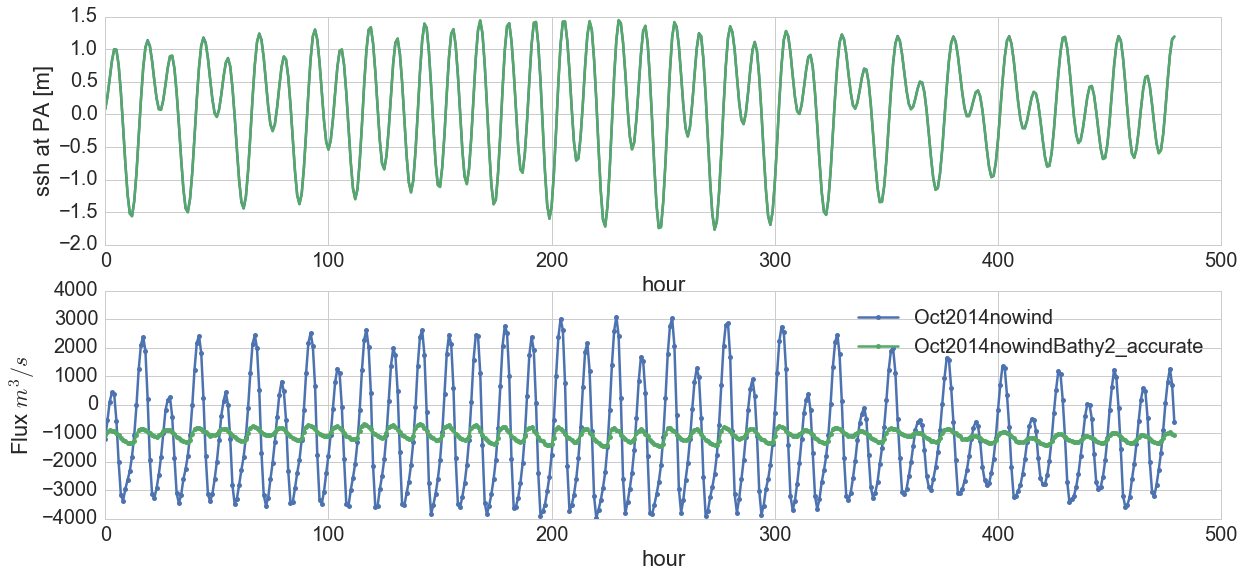

In [43]:
plot_series_transport_topfour(S,U,V,ssh,lon,lat,depU,depV,'8',0,479,30,fresh_flag='None')

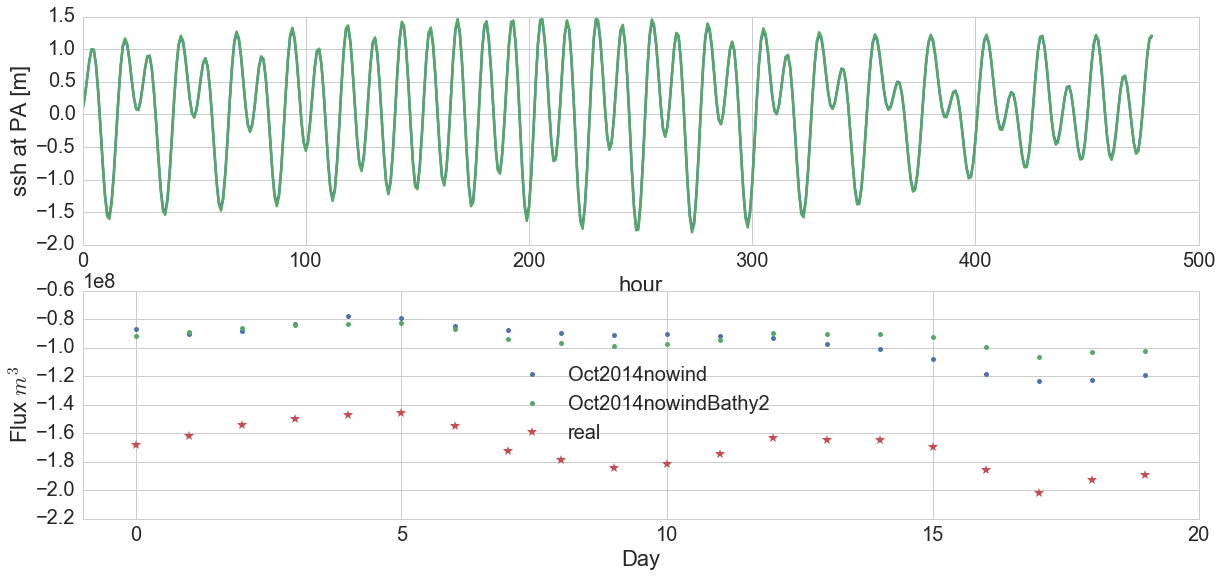

In [40]:
plot_series_transportDaily_topfour(S,U,V,ssh,lon,lat,depU,depV,'8',0,479,30,fresh_flag='None')

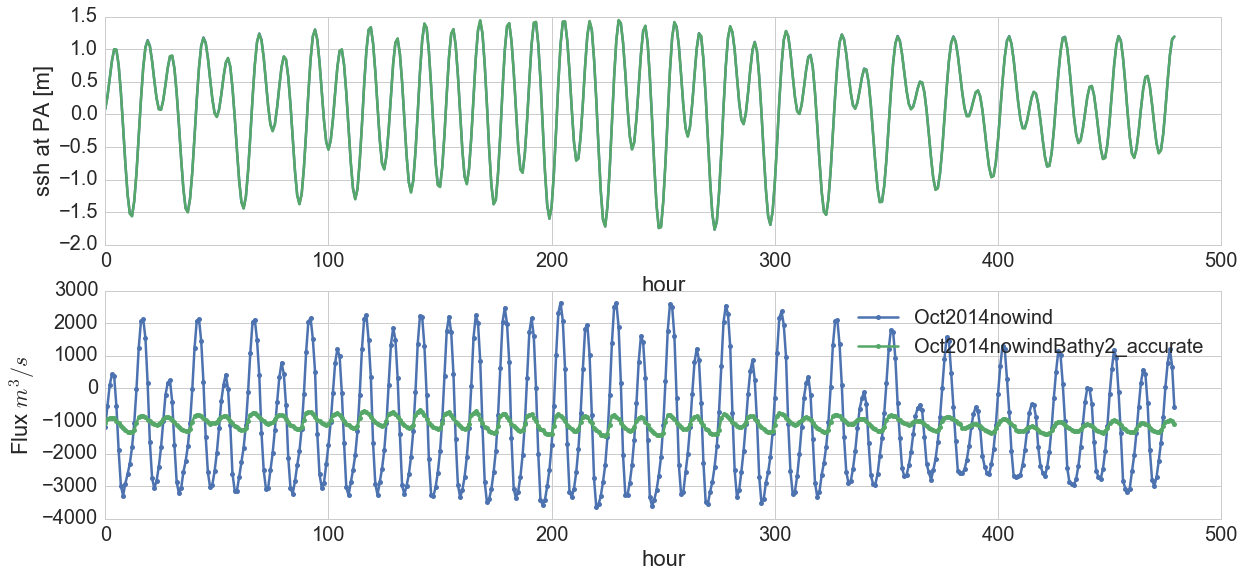

In [45]:
plot_series_transport_topfour(S,U,V,ssh,lon,lat,depU,depV,'8',0,479,30,fresh_flag='fresh')

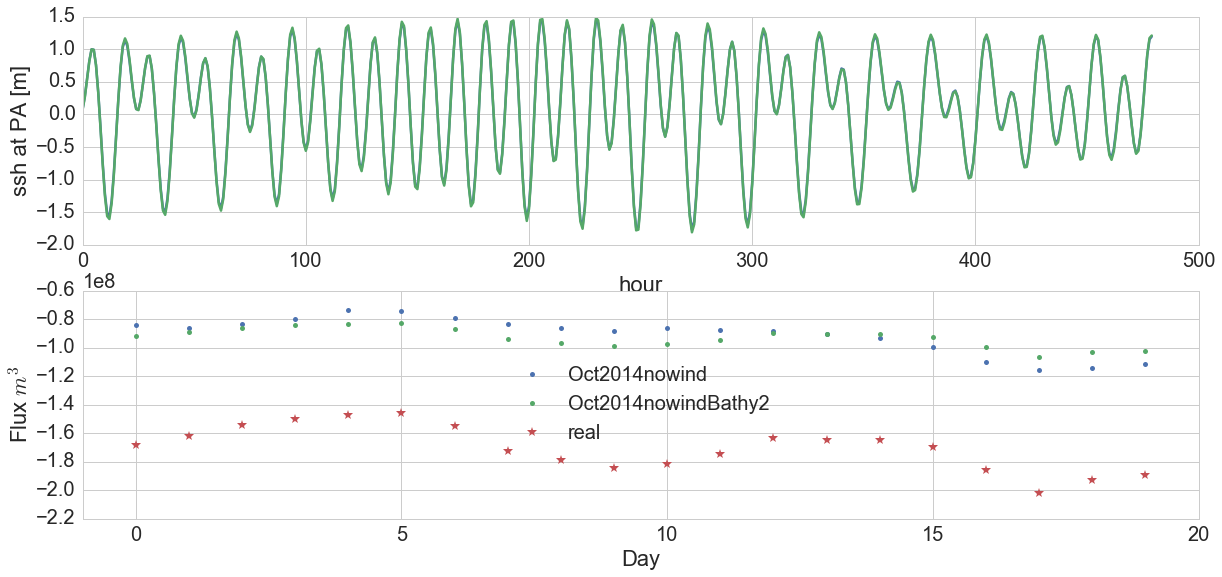

In [41]:
plot_series_transportDaily_topfour(S,U,V,ssh,lon,lat,depU,depV,'8',0,479,30,fresh_flag='fresh')

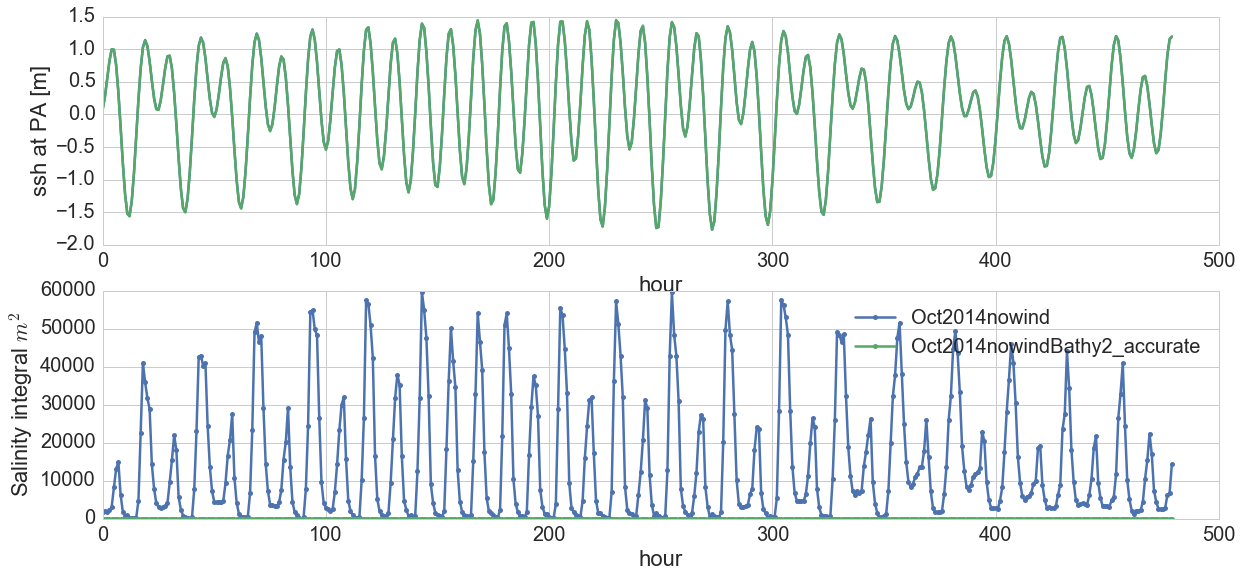

In [48]:
plot_series_transport_topfour(S,U,V,ssh,lon,lat,depU,depV,'8',0,479,30,fresh_flag='saltNoV')

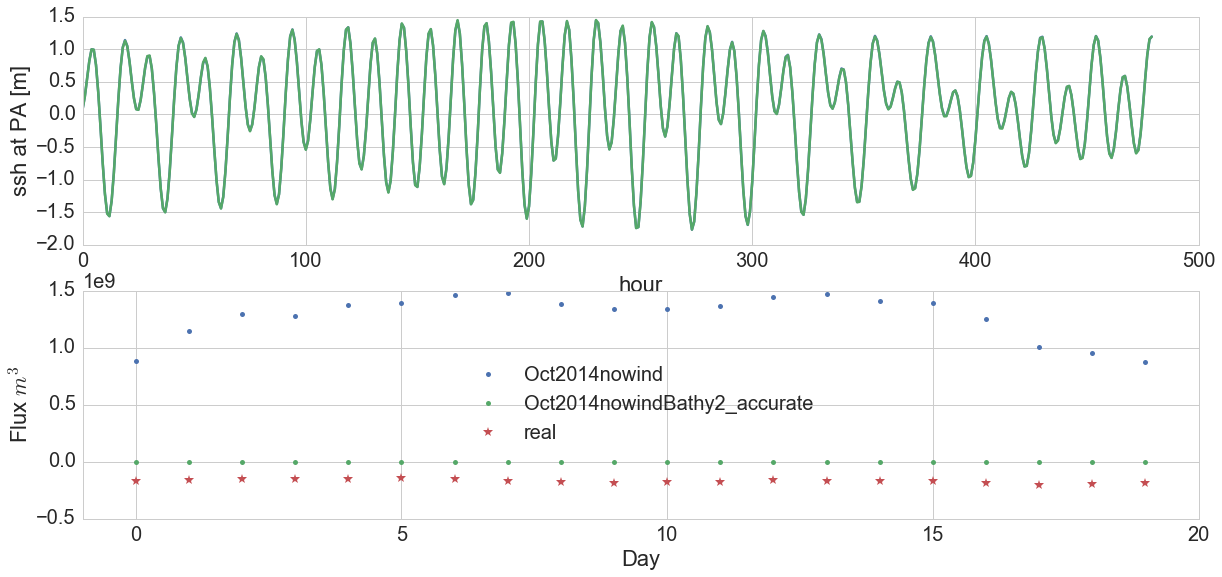

In [49]:
plot_series_transportDaily_topfour(S,U,V,ssh,lon,lat,depU,depV,'8',0,479,30,fresh_flag='saltNoV')

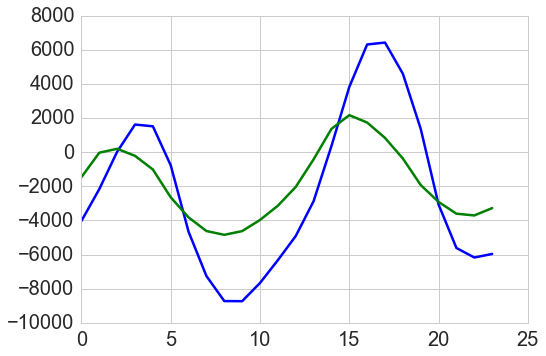

In [65]:
## total flux
plt.plot(np.nansum(np.nansum(trans['Oct2014nowind'][0:24,0:5,:],axis = 1),axis = 1),'b')
plt.plot(np.nansum(np.nansum(trans['Oct2014nowindBathy2_accurate'][0:24,0:5,:],axis = 1),axis = 1),'g')

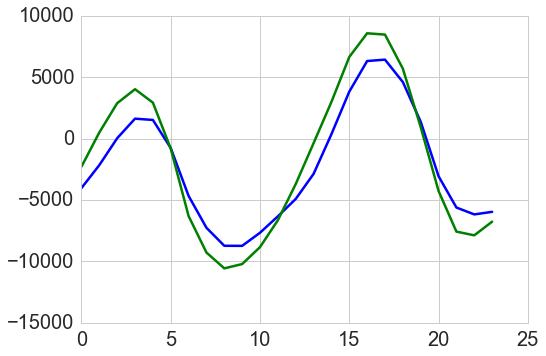

In [66]:
plt.plot(np.nansum(np.nansum(trans['Oct2014nowind'][0:24,0:5,:],axis = 1),axis = 1),'b')
plt.plot(np.nansum(np.nansum(trans['Oct2014nowind'][0:24,:,:],axis = 1),axis = 1),'g')

In [44]:
transFre,trans_surfFre,trans_toFre=transport_calculate(S,U,V,ssh,lon,lat,depU,depV,'8',0,719,30,fresh_flag='fresh')

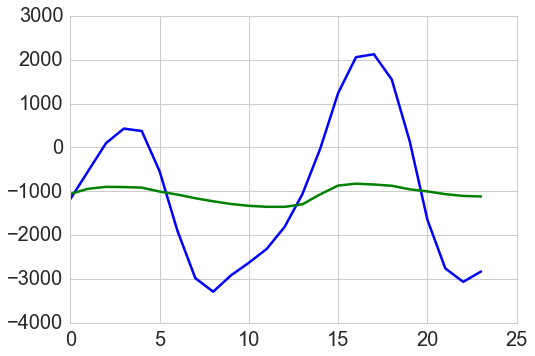

In [45]:
## freshwater flux
plt.plot(np.nansum(np.nansum(transFre['Oct2014nowind'][0:24,0:5,:],axis = 1),axis = 1),'b')
plt.plot(np.nansum(np.nansum(transFre['Oct2014nowindBathy2'][0:24,0:5,:],axis = 1),axis = 1),'g')

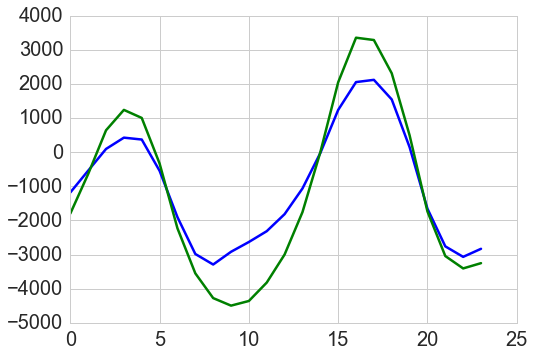

In [46]:
plt.plot(np.nansum(np.nansum(transFre['Oct2014nowind'][0:24,0:5,:],axis = 1),axis = 1),'b')
plt.plot(np.nansum(np.nansum(transFre['Oct2014nowind'][0:24,:,:],axis = 1),axis = 1),'g')

# Check salinity at the mouth between bathy6 &2, between upper 4m and below

In [51]:
def check_Salinity_Profile(t,j,i,t1,t2):
    """Check salinity profile at the river mouth transect"""
    fig,axs = plt.subplots(1,4,figsize = (18,5))
    ax = axs[0]
    S1 = np.ma.masked_values(S['Oct2014nowind'][t,:,j,i],0)
    S2 = np.ma.masked_values(S['Oct2014nowindBathy2_accurate'][t,:,j,i],0)
    ax.plot(S1,depT,color = 'b',label = 'bathy6')
    ax.plot(S2,depT,color = 'g',label = 'bathy2')
    ax.set_ylim([depT[10],depT[0]])
    ax.legend(loc = 'best')
    ax = axs[1]
    U1 = np.ma.masked_values(U['Oct2014nowind'][t,:,j,i],0)
    U2 = np.ma.masked_values(U['Oct2014nowindBathy2_accurate'][t,:,j,i],0)
    ax.plot(U1,depT,color = 'b',label = 'bathy6')
    ax.plot(U2,depT,color = 'g',label = 'bathy2')
    ax.legend(loc = 'best')
    ax.set_ylim([depT[10],depT[0]])
    ax = axs[2]
    viz_tools.plot_coastline(ax, grid6, coords = 'map')
    viz_tools.plot_coastline(ax, grid6, coords = 'map', isobath = 5,color = 'DarkViolet')
    ax.plot(X[j,i],Y[j,i],'y^')
    ax.set_xlim([-123.4,-122.5])
    ax.set_ylim([48.95,49.2])
    ax = axs[3]
    ax.plot(np.arange(t1,t2+1),ssh['Oct2014nowind'][t1:t2+1,86,89])
    ax.plot(t,ssh['Oct2014nowind'][t,86,89],'r*',markersize = 13)

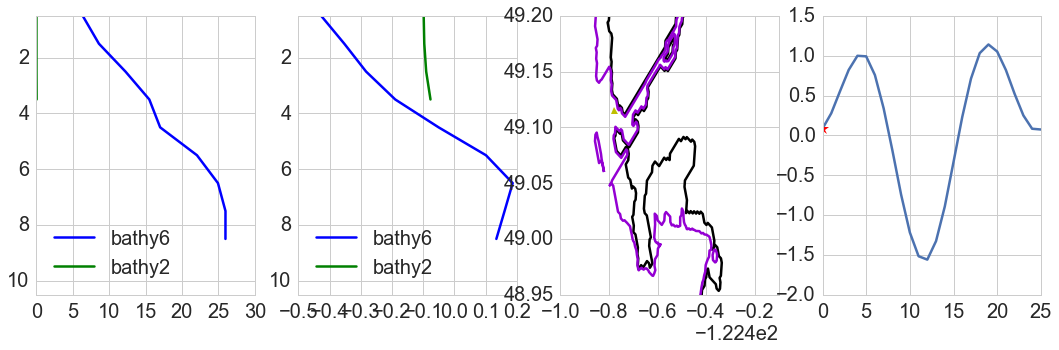

In [52]:
## start
check_Salinity_Profile(0,41,72,0,25)

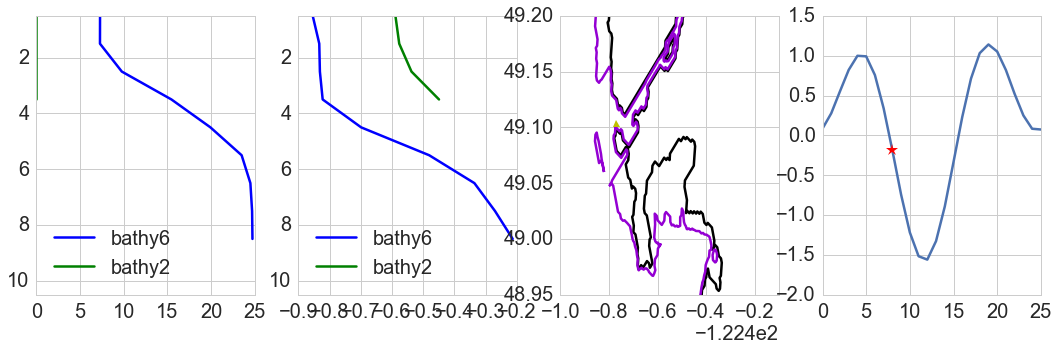

In [53]:
check_Salinity_Profile(8,38,72,0,25)

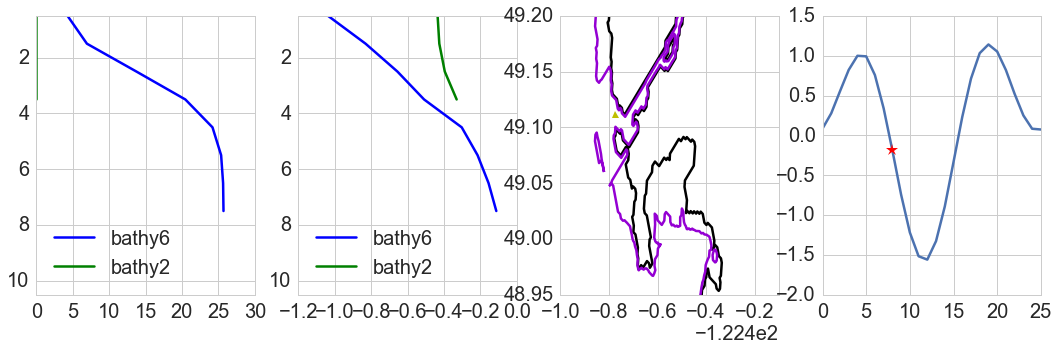

In [54]:
check_Salinity_Profile(8,40,72,0,25)

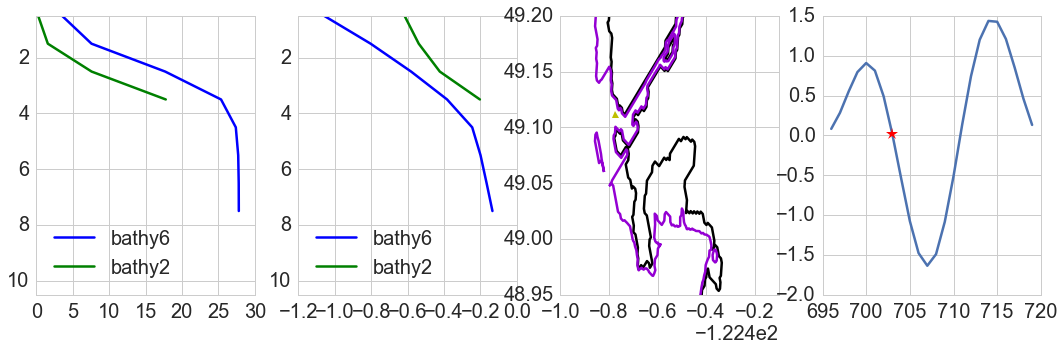

In [55]:
## end
check_Salinity_Profile(703,40,72,696,719)

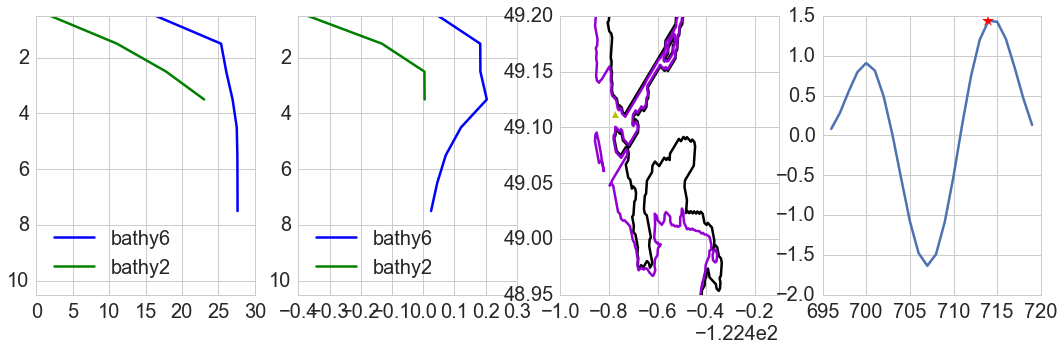

In [56]:
check_Salinity_Profile(714,40,72,696,719)

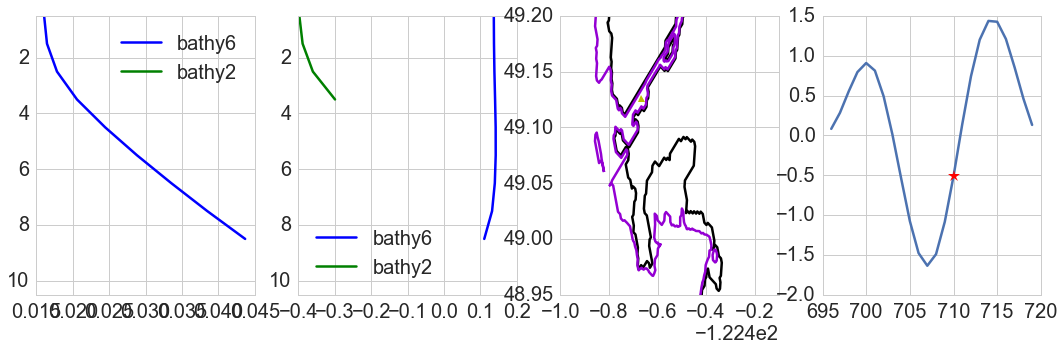

In [57]:
check_Salinity_Profile(710,35,90,696,719)

* Hypothesis of stronger cross-strait flows, then stronger shear, then more vertical mixing, fails! Cause the shear is weaker in stronger cross-strait flow case. But more likely that the stronger u flows move upper 3~4 m depths all together.

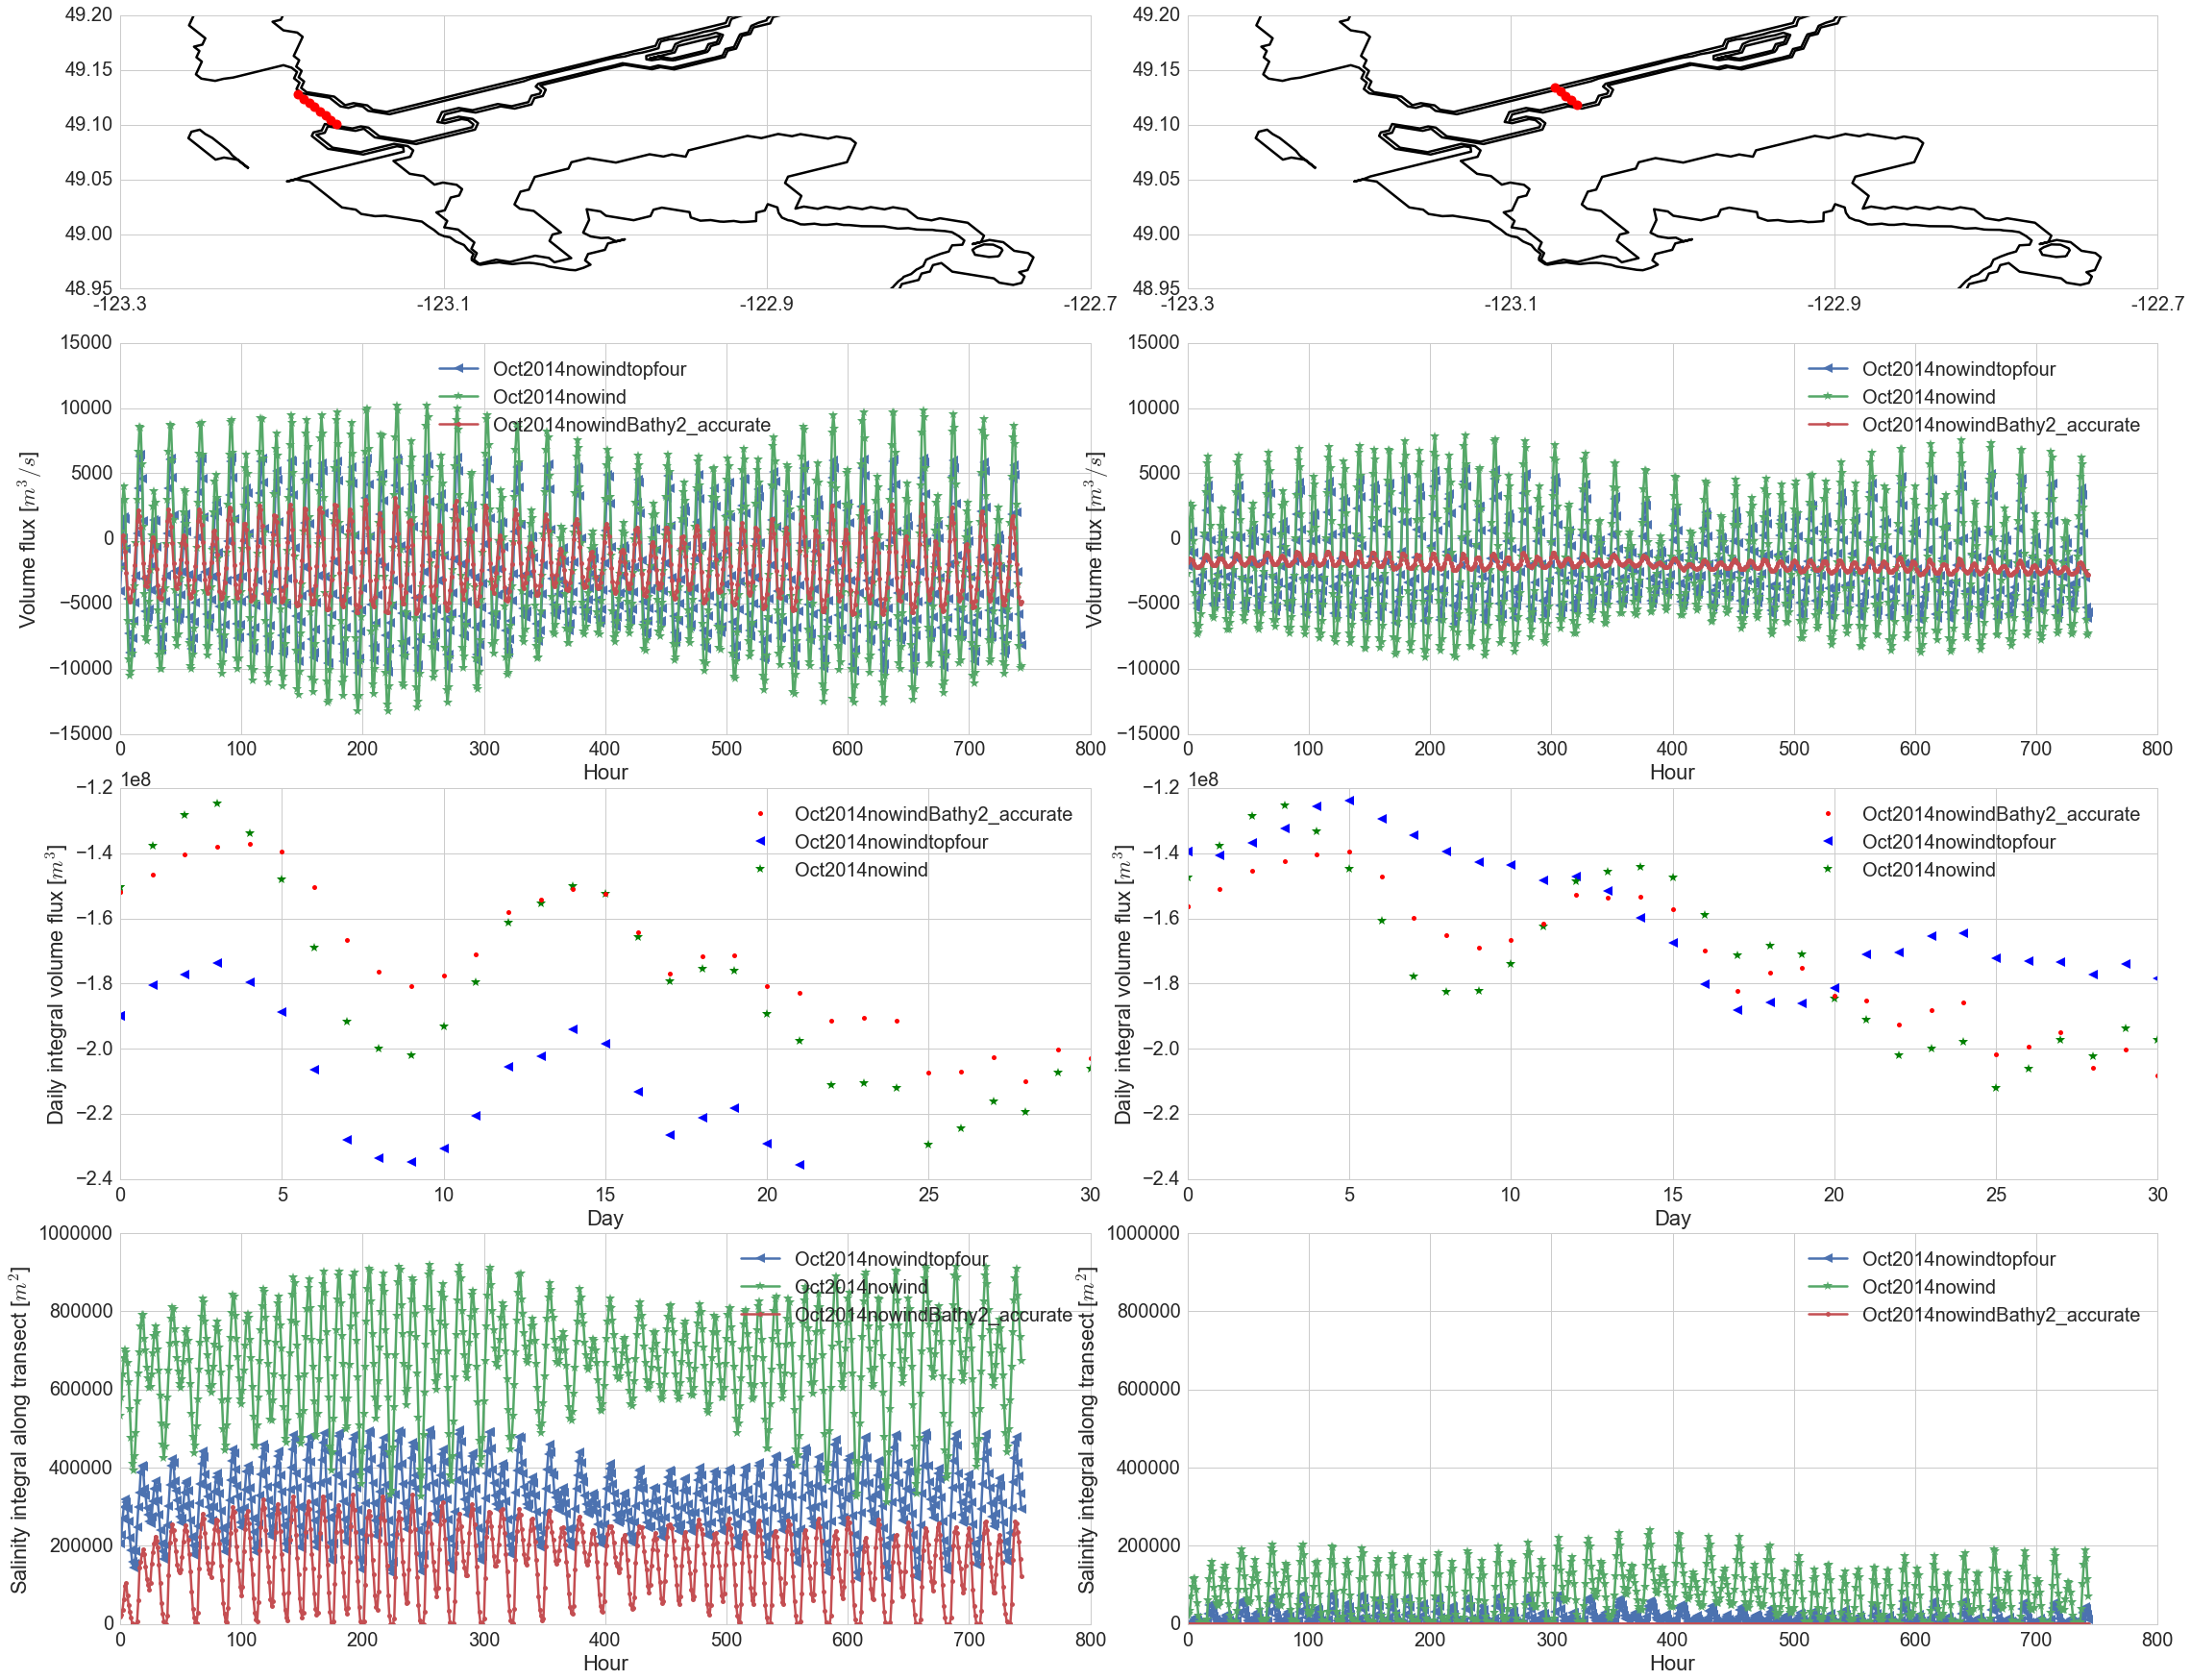

In [48]:
tst = 0;ten=743;
fig = plt.figure(figsize=(38,30))
gs = gridspec.GridSpec(4, 2,width_ratios=[1, 1], height_ratios=[0.7,1,1,1])  
gs.update(hspace=0.15, wspace=0.1) 
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
for ax, tran in zip([ax0,ax1],['4','8']):
    viz_tools.plot_coastline(ax, grid6, coords = 'map')
    viz_tools.plot_coastline(ax, grid6, coords = 'map', isobath = 5)
    ax.plot(X[transects[tran]['jst']:transects[tran]['jen'],transects[tran]['ist']],
            Y[transects[tran]['jst']:transects[tran]['jen'],transects[tran]['ist']],'ro',markersize  = 10)
    ax.set_xlim([-123.3,-122.7])
    ax.set_xticks([-123.3,-123.1,-122.9,-122.7])
    ax.set_xticklabels([-123.3,-123.1,-122.9,-122.7])
    ax.set_ylim([48.95,49.2])
for ax,axx, tran in zip([ax2,ax3],[ax4,ax5],['4','8']): ## volume flux
    trans,trans_surf,trans_to = transport_calculate(S,U,V,ssh,lon,lat,depU,depV,tran,tst,ten,30,fresh_flag = 'None')
    trans_topFour = {}; trans_all_2 = {};trans_all_6 = {}
    inte_trans_top4 = {};inte_trans_2 = {}; inte_trans_6 = {}
    
    for pa in paths:
        if pa == 'Oct2014nowindBathy2_accurate':
            inte_trans_2[pa] = np.zeros((ten+1)/24)
            trans_all_2[pa] = np.nansum(np.nansum(trans[pa][tst:ten+1],axis = 1),axis = 1)
            ax.plot(trans_all_2[pa],'-',marker = '.',label = pa,markersize = 10)
            for i in np.arange(tst,ten+1,24):
                inte_trans_2[pa][i/24] = np.sum(trans_all_2[pa][i:i+24])*3600
            axx.plot(inte_trans_2[pa],'.',color = 'r',markersize = 10)
        elif pa == 'Oct2014nowind':
            inte_trans_6[pa] = np.zeros((ten+1)/24)
            inte_trans_top4[pa] = np.zeros((ten+1)/24)
            trans_topFour[pa] = np.nansum(np.nansum(trans[pa][tst:ten+1,0:5],axis = 1),axis = 1)
            trans_all_6[pa] = np.nansum(np.nansum(trans[pa][tst:ten+1],axis = 1),axis = 1)
            ax.plot(trans_topFour[pa],'-',marker = '<',label = pa+'topfour',markersize = 10)    
            ax.plot(trans_all_6[pa],'-',marker = '*',label = pa,markersize = 10)
            for i in np.arange(tst,ten+1,24):
                inte_trans_6[pa][i/24] = np.sum(trans_all_6[pa][i:i+24])*3600
                inte_trans_top4[pa][i/24] = np.sum(trans_topFour[pa][i:i+24])*3600
            axx.plot(inte_trans_top4[pa],'<',color = 'b',markersize = 10)
            axx.plot(inte_trans_6[pa],'*',color = 'g',markersize = 10)
        ax.legend(loc = 'best')
        ax.set_xlabel('Hour')
        ax.set_ylabel('Volume flux [$m^3/s$]')
        ax.set_ylim([-1.5e4,1.5e4])
    axx.plot(inte_trans_2['Oct2014nowindBathy2_accurate'][0],'.',color = 'r',markersize = 10,label = paths[1])
    axx.plot(inte_trans_top4['Oct2014nowind'][0],'<',color= 'b',markersize = 10,label ='Oct2014nowindtopfour' )
    axx.plot(inte_trans_6['Oct2014nowind'][0],'*',color='g',markersize = 10,label = 'Oct2014nowind')
    axx.legend(loc = 'best')
    axx.set_xlabel('Day')
    axx.set_ylabel('Daily integral volume flux [$m^3$]')
    axx.set_ylim([-2.4e8,-1.2e8])
            
for ax, tran in zip([ax6,ax7],['4','8']): ## salinity
    trans,trans_surf,trans_to = transport_calculate(S,U,V,ssh,lon,lat,depU,depV,tran,tst,ten,30,fresh_flag = 'saltNoV')
    trans_topFour = {}; trans_all_2 = {};trans_all_6 = {}
    for pa in paths:
        if pa == 'Oct2014nowindBathy2_accurate':
            trans_all_2[pa] = np.nansum(np.nansum(trans[pa][tst:ten+1],axis = 1),axis = 1)
            ax.plot(trans_all_2[pa],'-',marker = '.',label = pa,markersize = 10)
        else:
            trans_topFour[pa] = np.nansum(np.nansum(trans[pa][tst:ten+1,0:5],axis = 1),axis = 1)
            trans_all_6[pa] = np.nansum(np.nansum(trans[pa][tst:ten+1],axis = 1),axis = 1)
            ax.plot(trans_topFour[pa],'-',marker = '<',label = pa+'topfour',markersize = 10)
            ax.plot(trans_all_6[pa],'-',marker = '*',label = pa,markersize = 10)
        ax.legend(loc = 'best')
    ax.set_ylim([0,1e6])
    ax.set_xlabel('Hour')
    ax.set_ylabel('Salinity integral along transect [$m^2$]')